In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, matthews_corrcoef, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn import metrics
import math
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn import svm
import xgboost as xgb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [2]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [3]:
data_train = pd.read_csv("../input/nslkdd/KDDTrain+_20Percent.txt" , sep = "," , encoding = 'utf-8', names=columns)

data_test = pd.read_csv("../input/nslkdd/KDDTest-21.txt" , sep = "," , encoding = 'utf-8', names=columns)

In [4]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,12
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,0.38,0.12,0.04,0.00,0.00,0.00,0.12,0.30,guess_passwd,2
1,0,udp,private,SF,44,0,0,0,0,0,...,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,12
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable,18
3,0,udp,private,SF,53,55,0,0,0,0,...,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal,17
4,0,tcp,private,SH,0,0,0,0,0,0,...,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0,udp,domain_u,SF,43,43,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,18
11846,0,tcp,http,SF,336,285,0,0,0,0,...,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,normal,18
11847,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,13
11848,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,15


In [6]:
# Đếm số lần xuất hiện của mỗi giá trị trong cột "attack"
attack_counts = data_test["outcome"].value_counts()

# In số dòng normal và các dòng khác normal
print("Số dòng normal:", attack_counts.get("normal", 0))
print("Số dòng attack:", sum(attack_counts) - attack_counts.get("normal", 0))

Số dòng normal: 2152
Số dòng attack: 9698


In [7]:
# Đếm số lần xuất hiện của mỗi giá trị trong cột "attack"
attack_counts = data_train["outcome"].value_counts()

# In số dòng normal và các dòng khác normal
print("Số dòng normal:", attack_counts.get("normal", 0))
print("Số dòng attack:", sum(attack_counts) - attack_counts.get("normal", 0))

Số dòng normal: 13449
Số dòng attack: 11743


In [8]:
# Gộp cột "attack" của cả hai DataFrame lại
combined_attack = pd.concat([data_train["outcome"], data_test["outcome"]])

# Đếm số lần xuất hiện của mỗi giá trị trong cột "attack"
attack_counts = combined_attack.value_counts()

# In số dòng normal và các dòng khác normal
print("Số dòng normal:", attack_counts.get("normal", 0))
print("Số dòng attack:", sum(attack_counts) - attack_counts.get("normal", 0))

Số dòng normal: 15601
Số dòng attack: 21441


In [9]:
data_train["outcome"].value_counts()

outcome
normal             13449
neptune             8282
ipsweep              710
satan                691
portsweep            587
smurf                529
nmap                 301
back                 196
teardrop             188
warezclient          181
pod                   38
guess_passwd          10
warezmaster            7
buffer_overflow        6
imap                   5
rootkit                4
multihop               2
phf                    2
ftp_write              1
land                   1
loadmodule             1
spy                    1
Name: count, dtype: int64

In [10]:
data_test["outcome"].value_counts()

outcome
normal             2152
neptune            1579
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               727
processtable        685
smurf               627
back                359
snmpguess           331
saint               309
mailbomb            293
snmpgetattack       178
portsweep           156
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
phf                   2
udpstorm              2
perl                  2
sqlattack             2
imap                  1
Name: count, dtype: int64

In [11]:
attack_labels = {
    'normal': 'Normal',
    'neptune': 'DOS',
    'satan': 'PROBE',
    'guess_passwd': 'R2L',
    'smurf': 'DOS',
    'mscan': 'PROBE',
    'warezmaster': 'R2L',
    'ipsweep': 'PROBE',
    'portsweep': 'PROBE',
    'apache2': 'DOS',
    'processtable': 'DOS',
    'back': 'DOS',
    'nmap': 'PROBE',
    'saint': 'PROBE',
    'mailbomb': 'DOS',
    'teardrop': 'DOS',
    'warezclient': 'R2L', # 181
    'httptunnel': 'U2R',
    'pod': 'DOS',
    'buffer_overflow': 'U2R',
    'multihop': 'U2R', # 20
    'named': 'U2R', # 17
    'rootkit': 'U2R',
    'ps': 'R2L', #15
    'sendmail': 'R2L',
    'xterm': 'U2R',
    'xlock': 'R2L', # 9
    'land': 'DOS',
    'imap': 'R2L',
    'phf': 'R2L',
    'xsnoop': 'R2L',
    'ftp_write': 'R2L', # 4
    'loadmodule': 'U2R',
    'worm': 'DOS',
    'udpstorm': 'R2L', #2
    'perl': 'U2R',
    'sqlattack': 'U2R',
    'snmpgetattack': 'U2R',    # 178
    'snmpguess': 'R2L', #  331
    'spy': 'R2L'
}

In [12]:
# Gộp hai DataFrame lại
complete_df = pd.concat([data_train, data_test], ignore_index=True)

# Đếm số lượng của từng loại tấn công trong DataFrame hoàn chỉnh
complete_attack_counts = complete_df["outcome"].value_counts()

# In kết quả
print("Tổng số lượng của từng loại tấn công:")
print(complete_attack_counts)

# Gộp các nhãn tấn công vào từng class tương ứng
complete_df["Attack class"] = complete_df["outcome"].map(attack_labels)

# Đếm số lượng của từng loại tấn công trong DataFrame hoàn chỉnh
complete_attack_counts = complete_df["Attack class"].value_counts()

# In kết quả
print("Tổng số lượng của từng loại tấn công:")
print(complete_attack_counts)

Tổng số lượng của từng loại tấn công:
outcome
normal             15601
neptune             9861
satan               1418
guess_passwd        1241
smurf               1156
mscan                996
warezmaster          951
ipsweep              851
portsweep            743
apache2              737
processtable         685
back                 555
nmap                 374
snmpguess            331
saint                309
mailbomb             293
teardrop             200
warezclient          181
snmpgetattack        178
httptunnel           133
pod                   79
buffer_overflow       26
multihop              20
named                 17
rootkit               17
ps                    15
sendmail              14
xterm                 13
xlock                  9
land                   8
imap                   6
phf                    4
xsnoop                 4
ftp_write              4
loadmodule             3
worm                   2
udpstorm               2
perl                   2
sqla

# Lựa chọn đặc trưng, chia tập dữ liệu

In [13]:
complete_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,Attack class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37037,0,udp,domain_u,SF,43,43,0,0,0,0,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,18,Normal
37038,0,tcp,http,SF,336,285,0,0,0,0,...,0.02,0.00,0.00,0.00,0.00,0.05,0.00,normal,18,Normal
37039,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,13,PROBE
37040,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,15,PROBE


In [14]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37042 entries, 0 to 37041
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     37042 non-null  int64  
 1   protocol_type                37042 non-null  object 
 2   service                      37042 non-null  object 
 3   flag                         37042 non-null  object 
 4   src_bytes                    37042 non-null  int64  
 5   dst_bytes                    37042 non-null  int64  
 6   land                         37042 non-null  int64  
 7   wrong_fragment               37042 non-null  int64  
 8   urgent                       37042 non-null  int64  
 9   hot                          37042 non-null  int64  
 10  num_failed_logins            37042 non-null  int64  
 11  logged_in                    37042 non-null  int64  
 12  num_compromised              37042 non-null  int64  
 13  root_shell      

In [15]:
complete_df.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000,37042.000000
mean,340.367286,22771.341045,2767.659981,0.000243,0.021273,0.000459,0.195535,0.013984,0.349441,0.227795,0.002430,0.001080,0.239674,0.015199,0.000945,0.004184,0.000000,0.000297,0.023136,87.638275,34.279467,0.231155,0.229643,0.168434,0.167637,0.690134,0.092686,0.096197,192.581421,115.855947,0.526127,0.103796,0.166340,0.029484,0.227699,0.224455,0.164555,0.161458,18.156606
std,2467.745218,2022034.450217,74500.015047,0.015586,0.241663,0.028926,1.906304,0.123478,0.476800,10.293569,0.049232,0.043458,11.371178,0.685076,0.040570,0.092123,0.000000,0.017230,0.150337,128.421921,90.608351,0.415323,0.416010,0.365532,0.366945,0.429237,0.245654,0.263845,95.084261,109.361800,0.441015,0.226857,0.333802,0.111810,0.405612,0.408250,0.337372,0.352593,3.697077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,120.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,67.000000,0.520000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
75%,0.000000,257.000000,330.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,141.000000,17.000000,0.080000,0.020000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,254.000000,1.000000,0.070000,0.070000,0.010000,0.130000,0.020000,0.040000,0.000000,21.000000
max,57715.000000,381709090.000000,5151385.000000,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,100.000000,5.000000,8.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [16]:
def correlation(df):
    df = df.select_dtypes(exclude=['object']) # Drop NaN columns
    df = df[[col for col in df if df[col].nunique() > 1]] # Keep columns with more than 1 unique values
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15,12))
    ax = sns.heatmap(corr)
    plt.show()

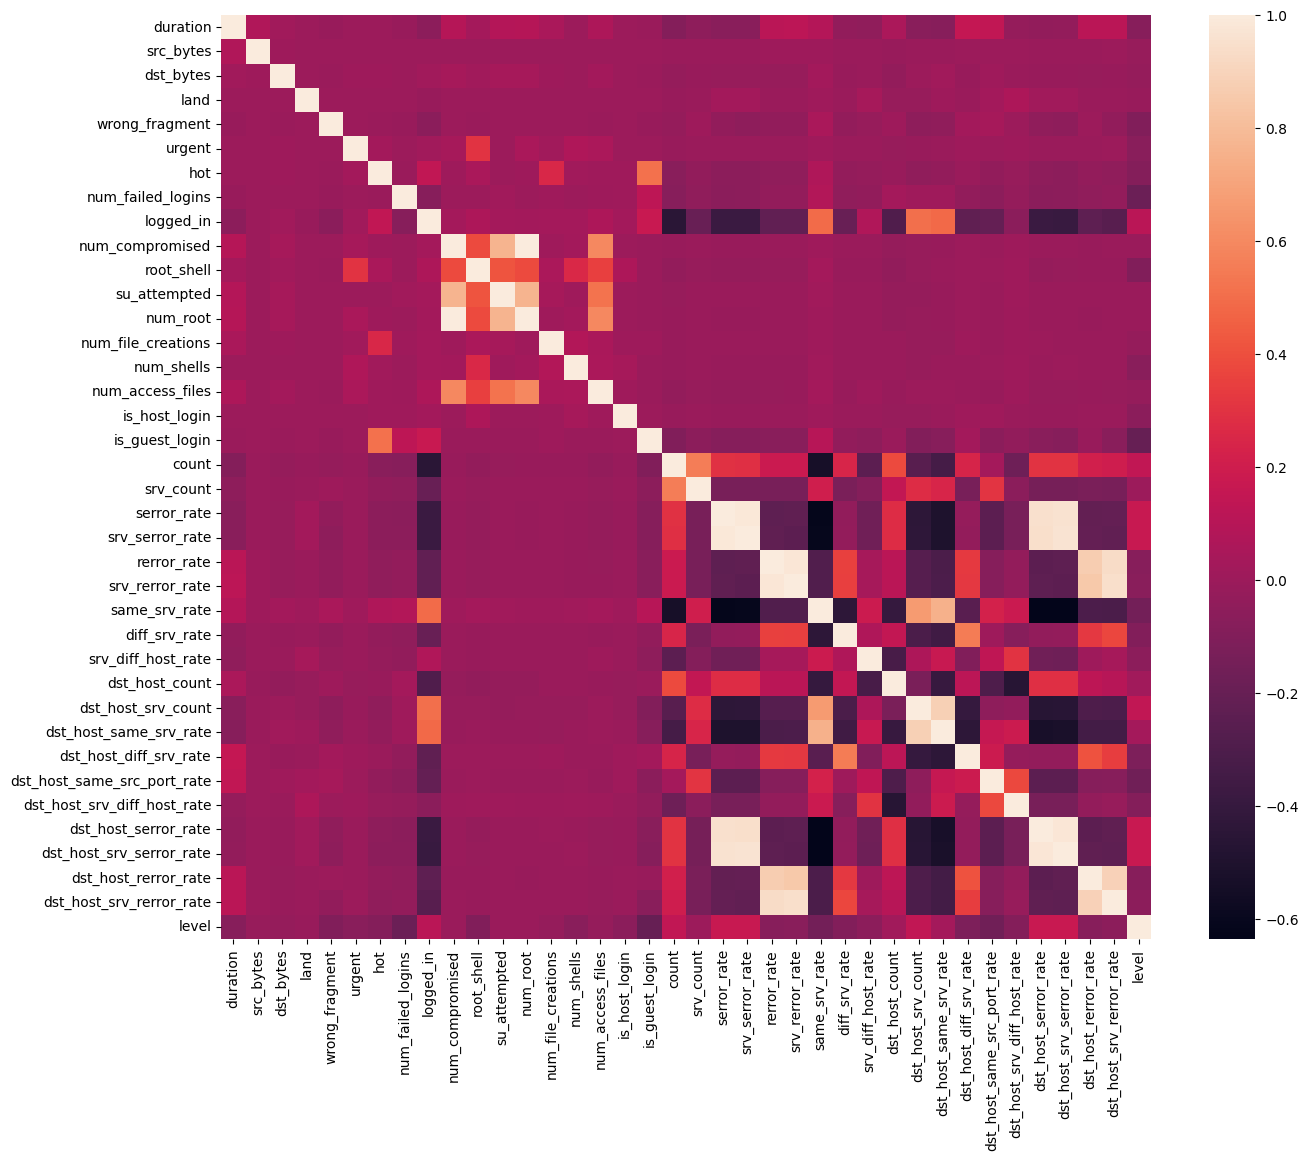

In [17]:
# Train data heatmap
correlation(complete_df)

In [18]:
def get_columns(df):
    data = []
    columns = df.select_dtypes('object').columns.to_list()
    for column in columns:
        data.append(column)
        data.append(df[column].value_counts().to_dict())
    return data

In [19]:
def bar_plots(data, title):
    fig, ax = plt.subplots(nrows=len(data)//2,
                           ncols=1,
                           figsize=(10,25))
    for i in range(0,len(data),2):
        ax[i//2].grid(which='Major', axis='both')
        ax[i//2].bar(data[i+1].keys(), data[i+1].values())
        ax[i//2].set(title=f" phân bổ {data[i]}",
                  xlabel=f"{data[i]}",
                  ylabel="Hiệu suất")
        if data[i] in ['service', 'class'] or len(data[i+1]) > 10:
            ax[i//2].tick_params(axis='x', labelrotation=90)
    fig.suptitle(f"biểu đồ {title} data", fontsize=16, fontweight="bold")
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)

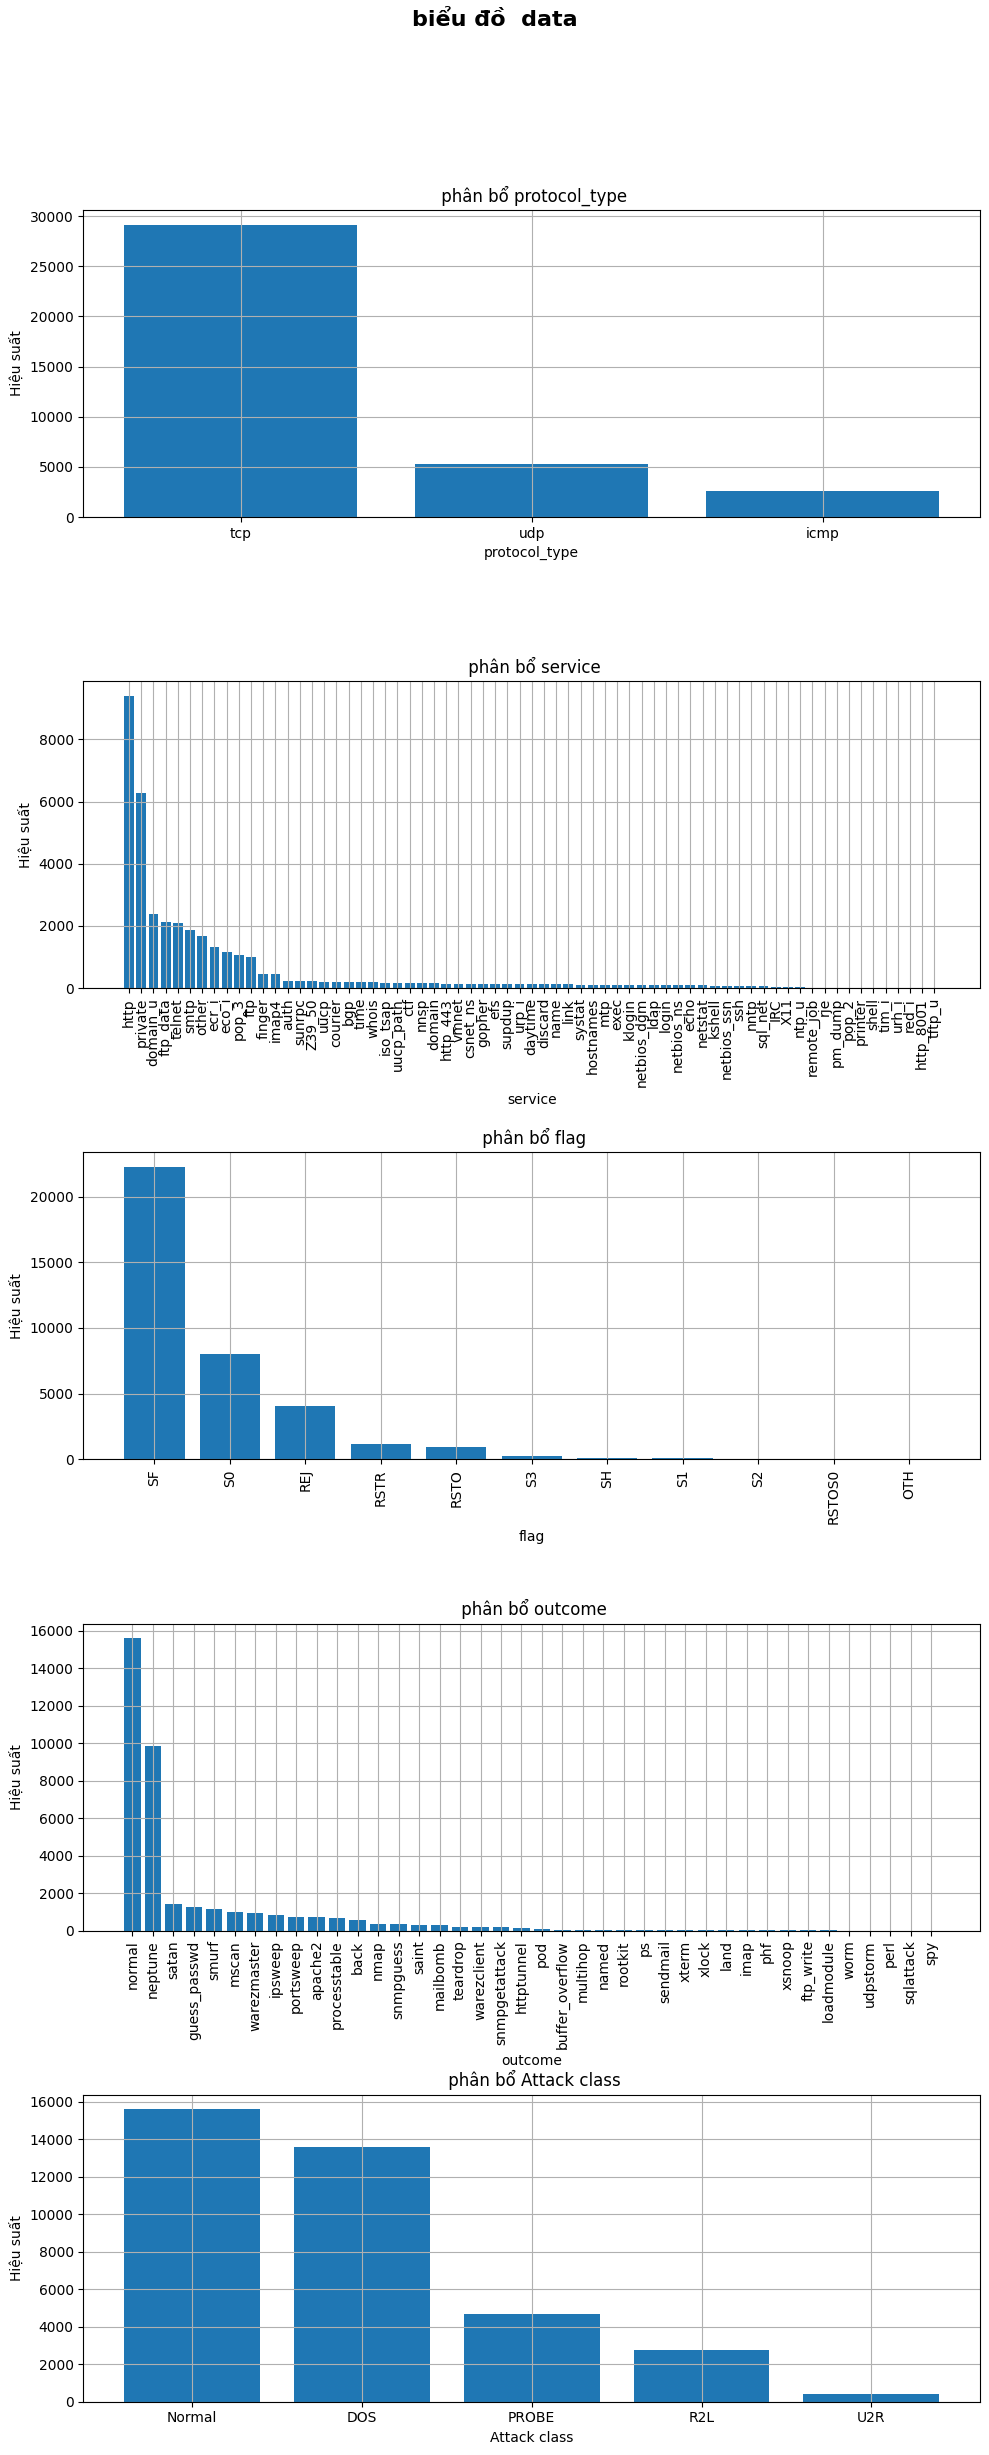

In [20]:
bar_plots(get_columns(complete_df), "")

In [21]:
def get_distribution(df, column):
    data = []
    protocols = df['protocol_type'].unique()
    for protocol in protocols:
        new_df = df.loc[df['protocol_type'] == protocol]
        data.append(protocol)
        data.append(new_df[column].value_counts().to_dict())
    return data

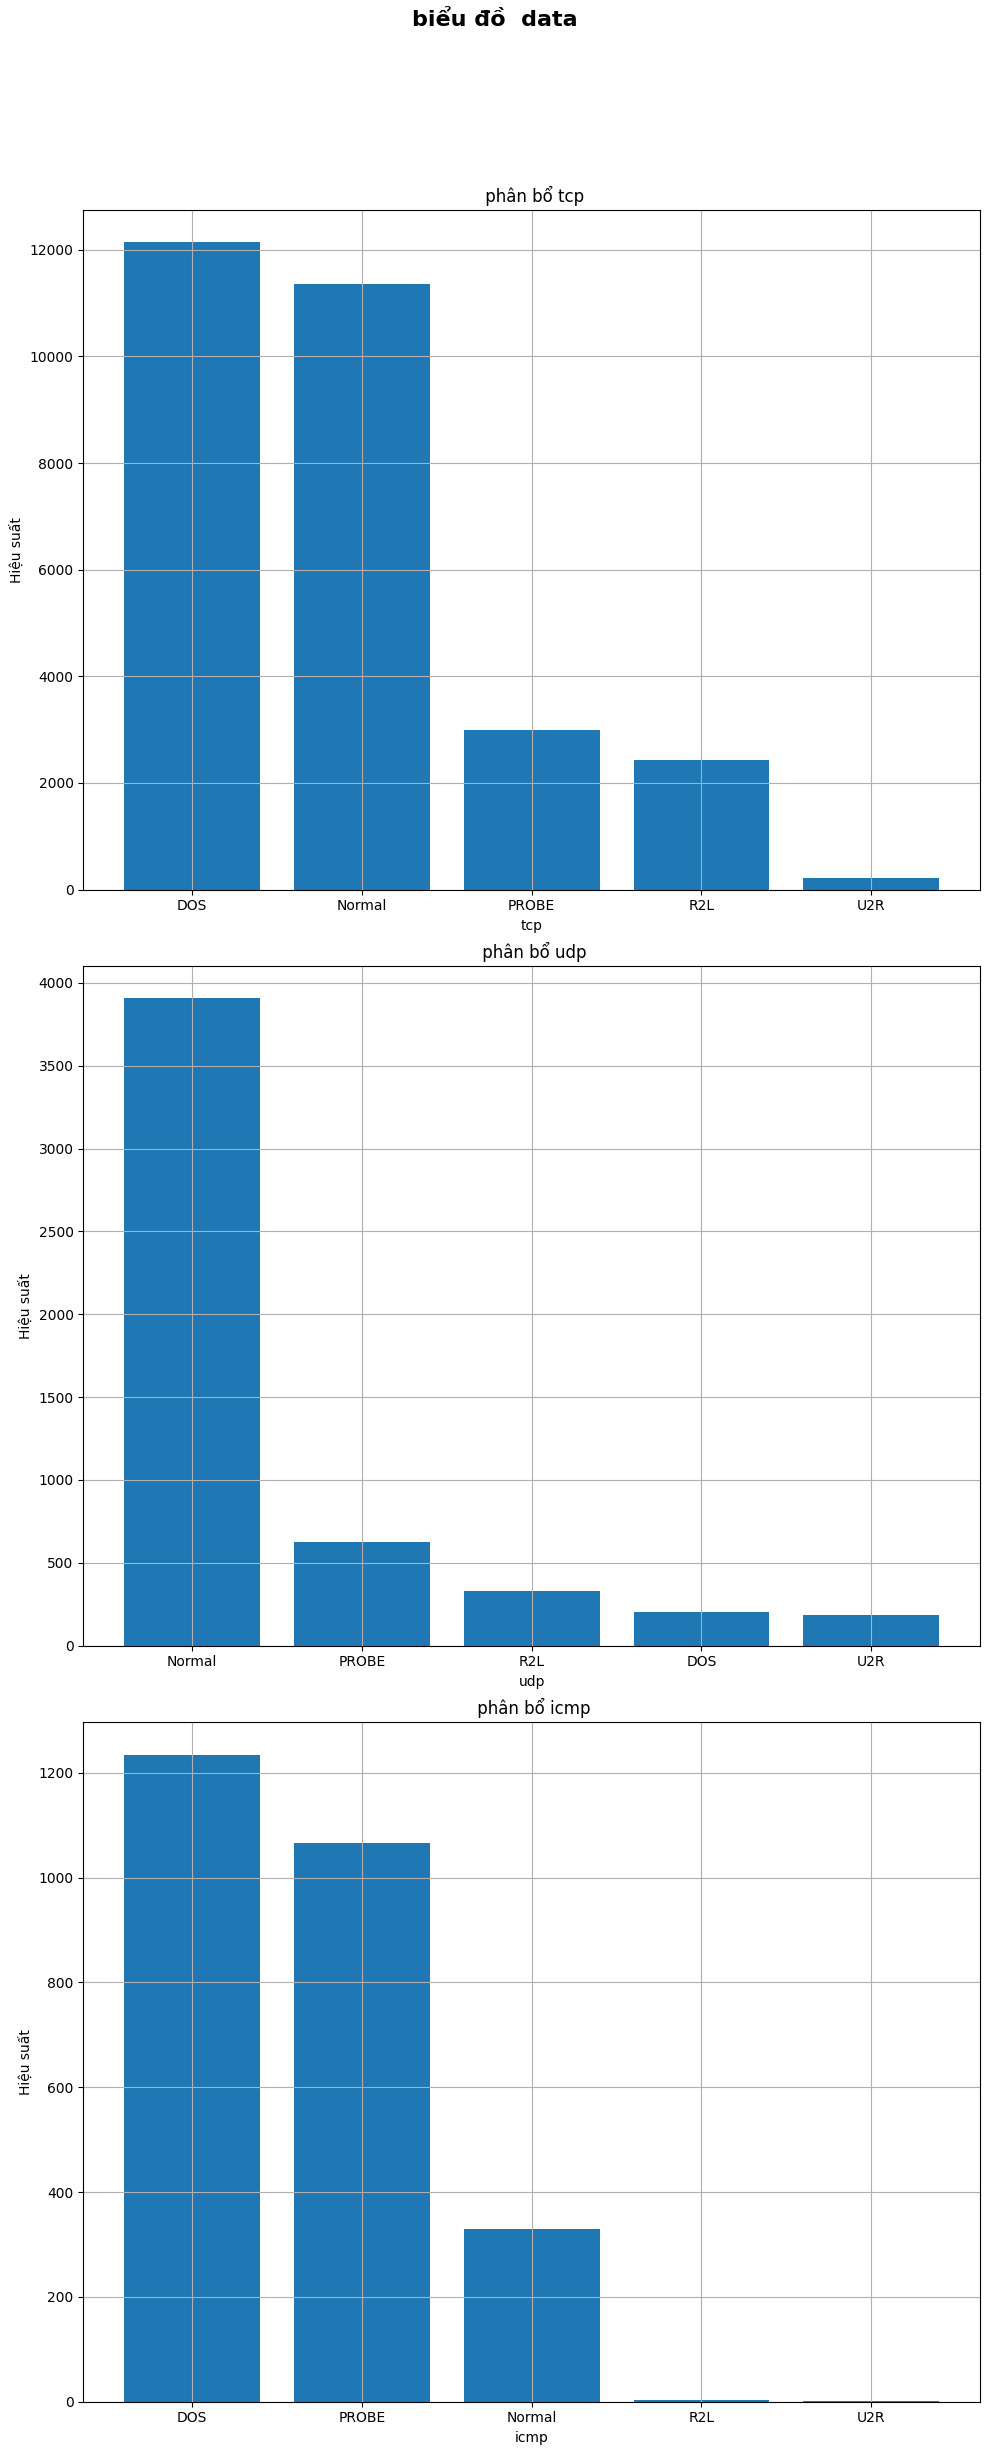

In [22]:
bar_plots(get_distribution(complete_df, "Attack class"),'')

In [23]:
def pie_plots(df, title):
    columns = ['protocol_type', 'outcome']
    columns_count = len(columns)
    fig, ax = plt.subplots(nrows=columns_count,
                           ncols=1,
                           figsize=(10,10))
    for i in range(columns_count):
        _dict = df[columns[i]].value_counts().to_dict()
        ax[i].pie(_dict.values())
        ax[i].set(title=f"phân bổ {columns[i]}")
        ax[i].legend(loc="upper right", labels=_dict.keys(), bbox_to_anchor=(1.55,0.75), title=f"{columns[i]}")
    fig.suptitle(f"phân bổ dữ liệu {title}", fontsize=16, fontweight="bold")

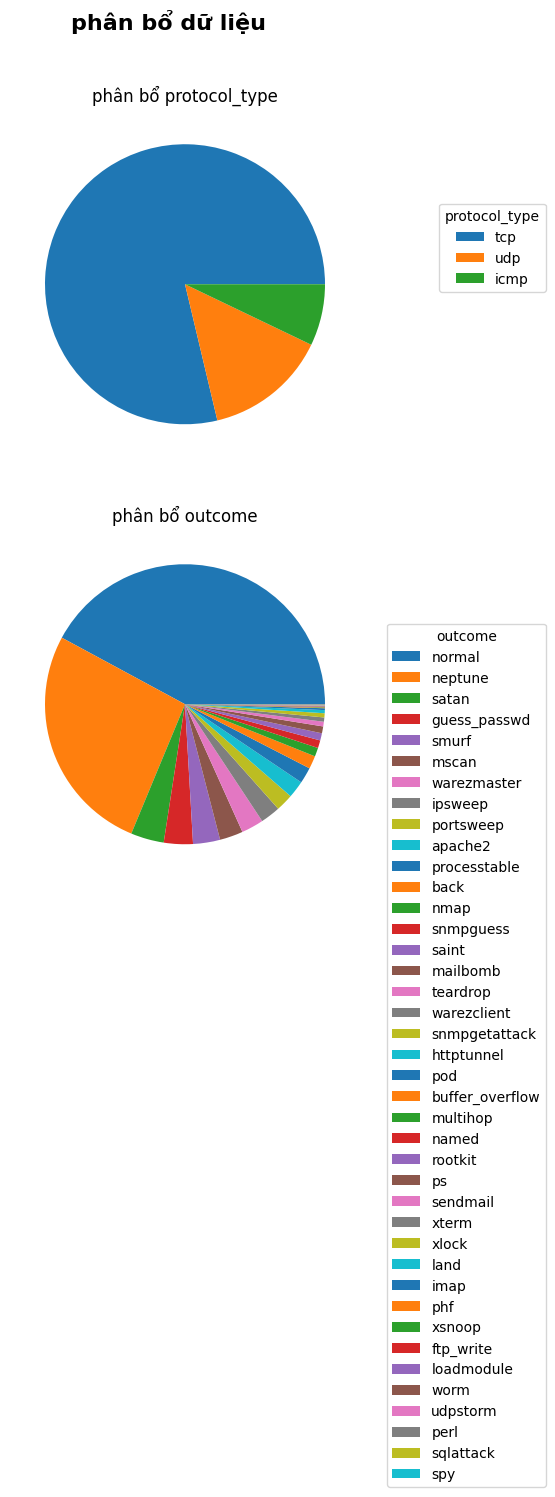

In [24]:
pie_plots(complete_df, "")

In [25]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,12
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [26]:
# Gộp các nhãn tấn công vào từng class tương ứng
data_train["Attack class"] = data_train["outcome"].map(attack_labels)

In [27]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,Attack class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19,DOS
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,12,R2L
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DOS
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,DOS


In [28]:
data_train.shape

(25192, 44)

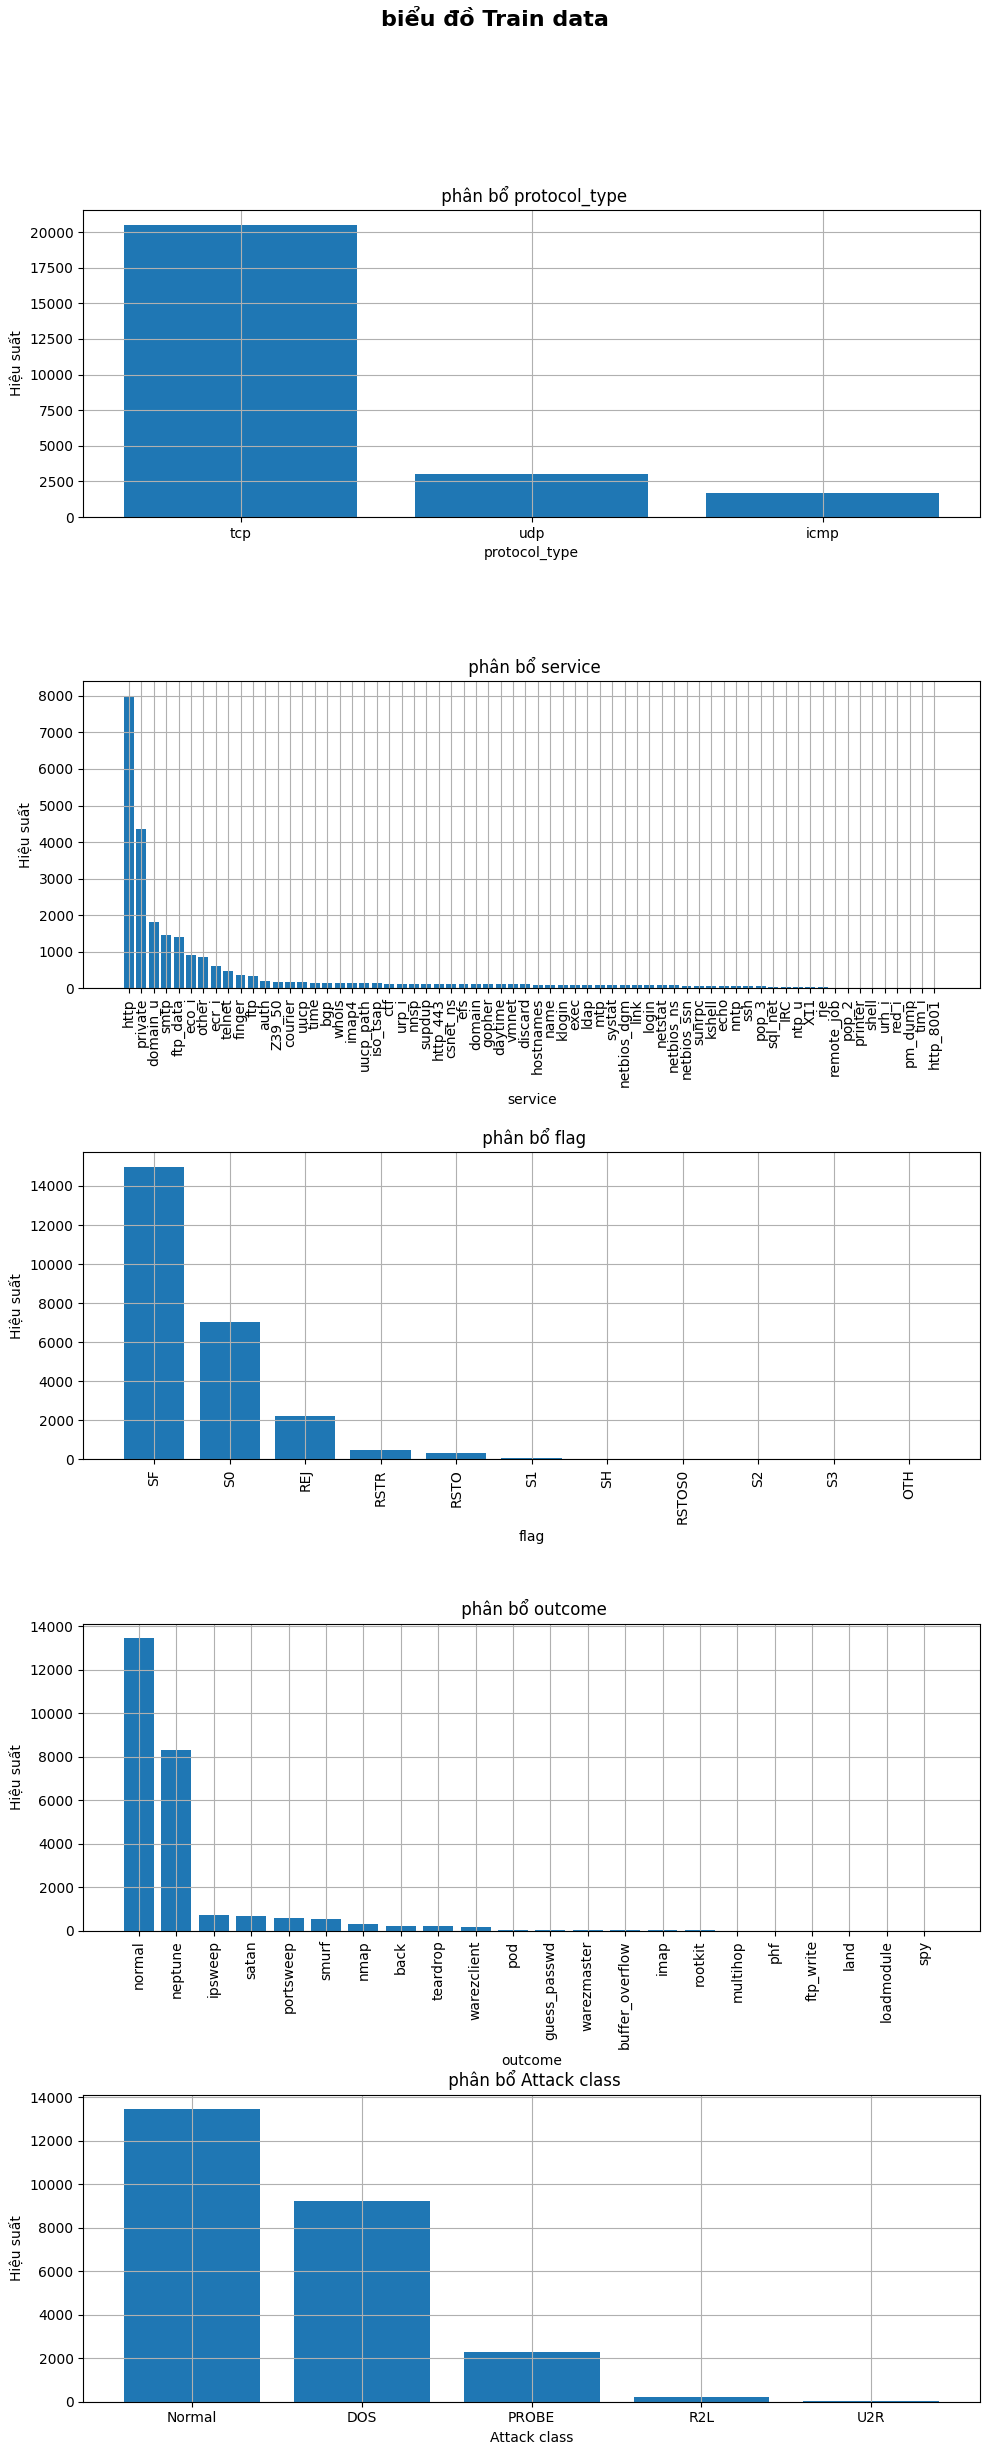

In [29]:
# Plot train data
bar_plots(get_columns(data_train), "Train")

## phân bố lớp tấn công train data

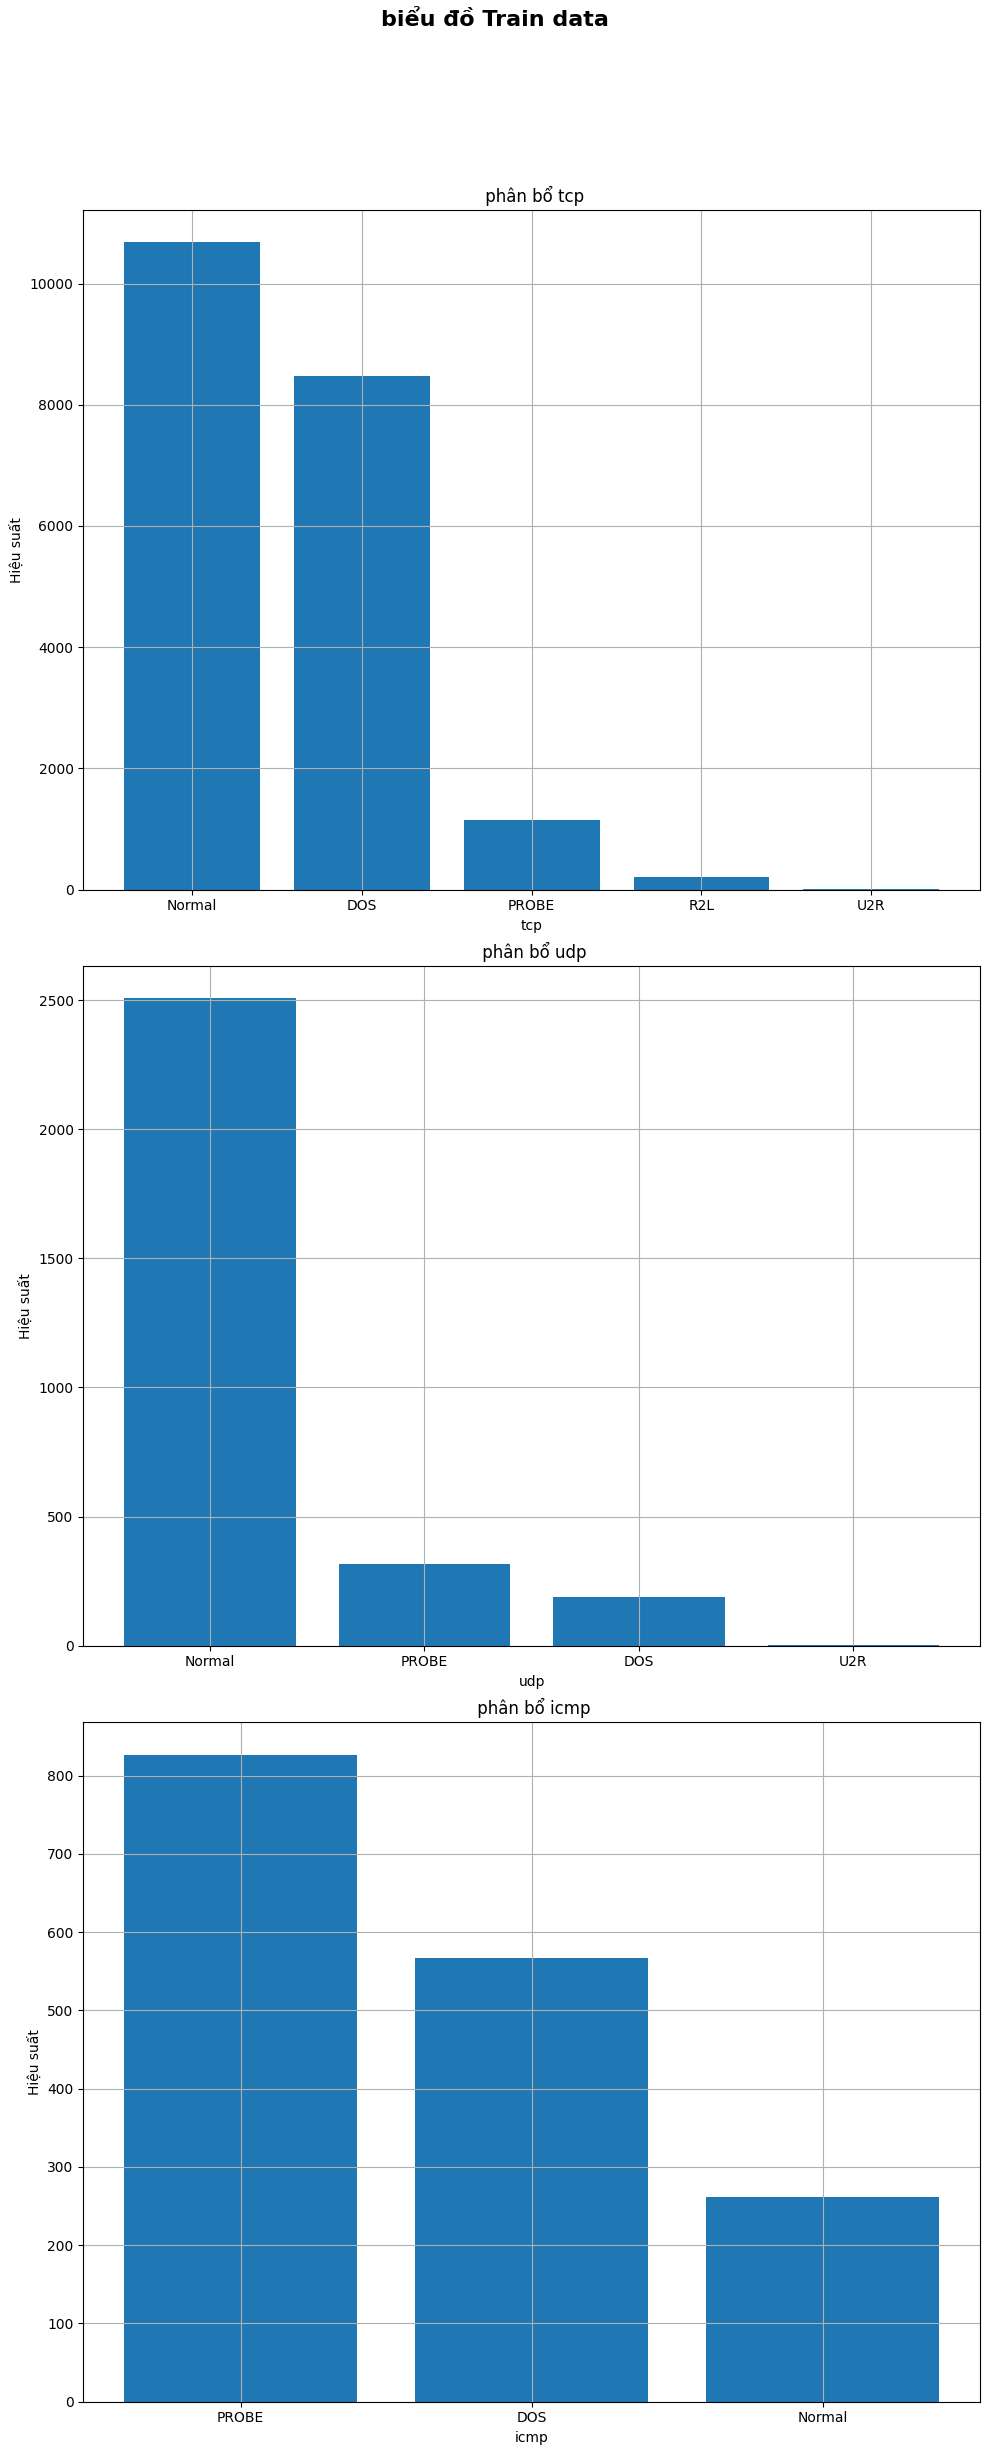

In [30]:
# Plot train data
bar_plots(get_distribution(data_train, "Attack class"), "Train")

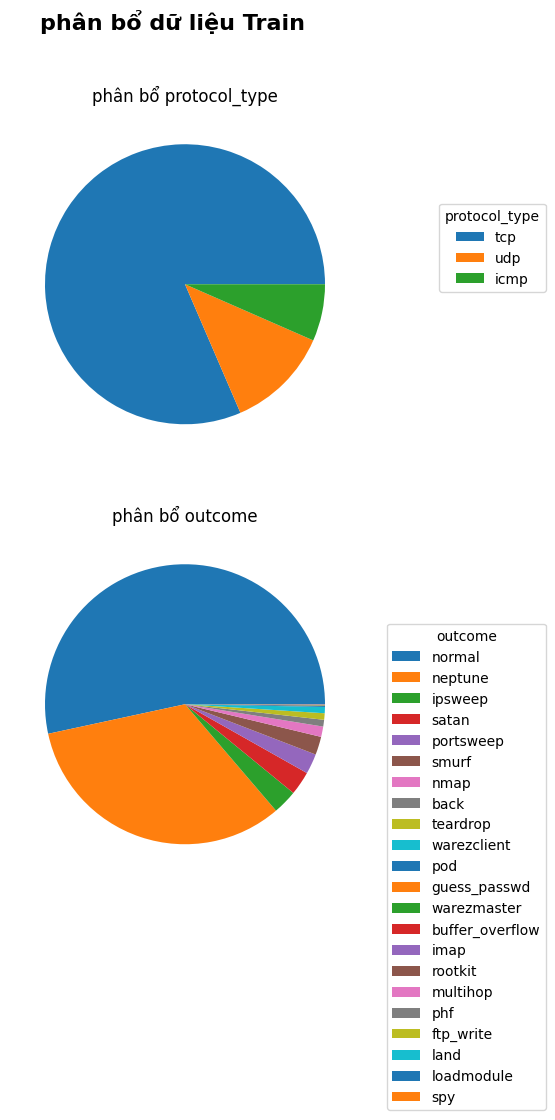

In [31]:
pie_plots(data_train, "Train")

## loại giao thức cho từng lớp tấn công

In [32]:
data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,0.38,0.12,0.04,0.00,0.00,0.00,0.12,0.30,guess_passwd,2
1,0,udp,private,SF,44,0,0,0,0,0,...,1.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,12
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.31,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable,18
3,0,udp,private,SF,53,55,0,0,0,0,...,1.00,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal,17
4,0,tcp,private,SH,0,0,0,0,0,0,...,0.06,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0,udp,domain_u,SF,43,43,0,0,0,0,...,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,18
11846,0,tcp,http,SF,336,285,0,0,0,0,...,0.92,0.02,0.00,0.00,0.00,0.00,0.05,0.00,normal,18
11847,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.37,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,13
11848,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.19,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,15


In [33]:
data_test.shape

(11850, 43)

In [34]:
# Gộp các nhãn tấn công vào từng class tương ứng
data_test["Attack class"] = data_test["outcome"].map(attack_labels)

In [35]:
data_test.shape

(11850, 44)

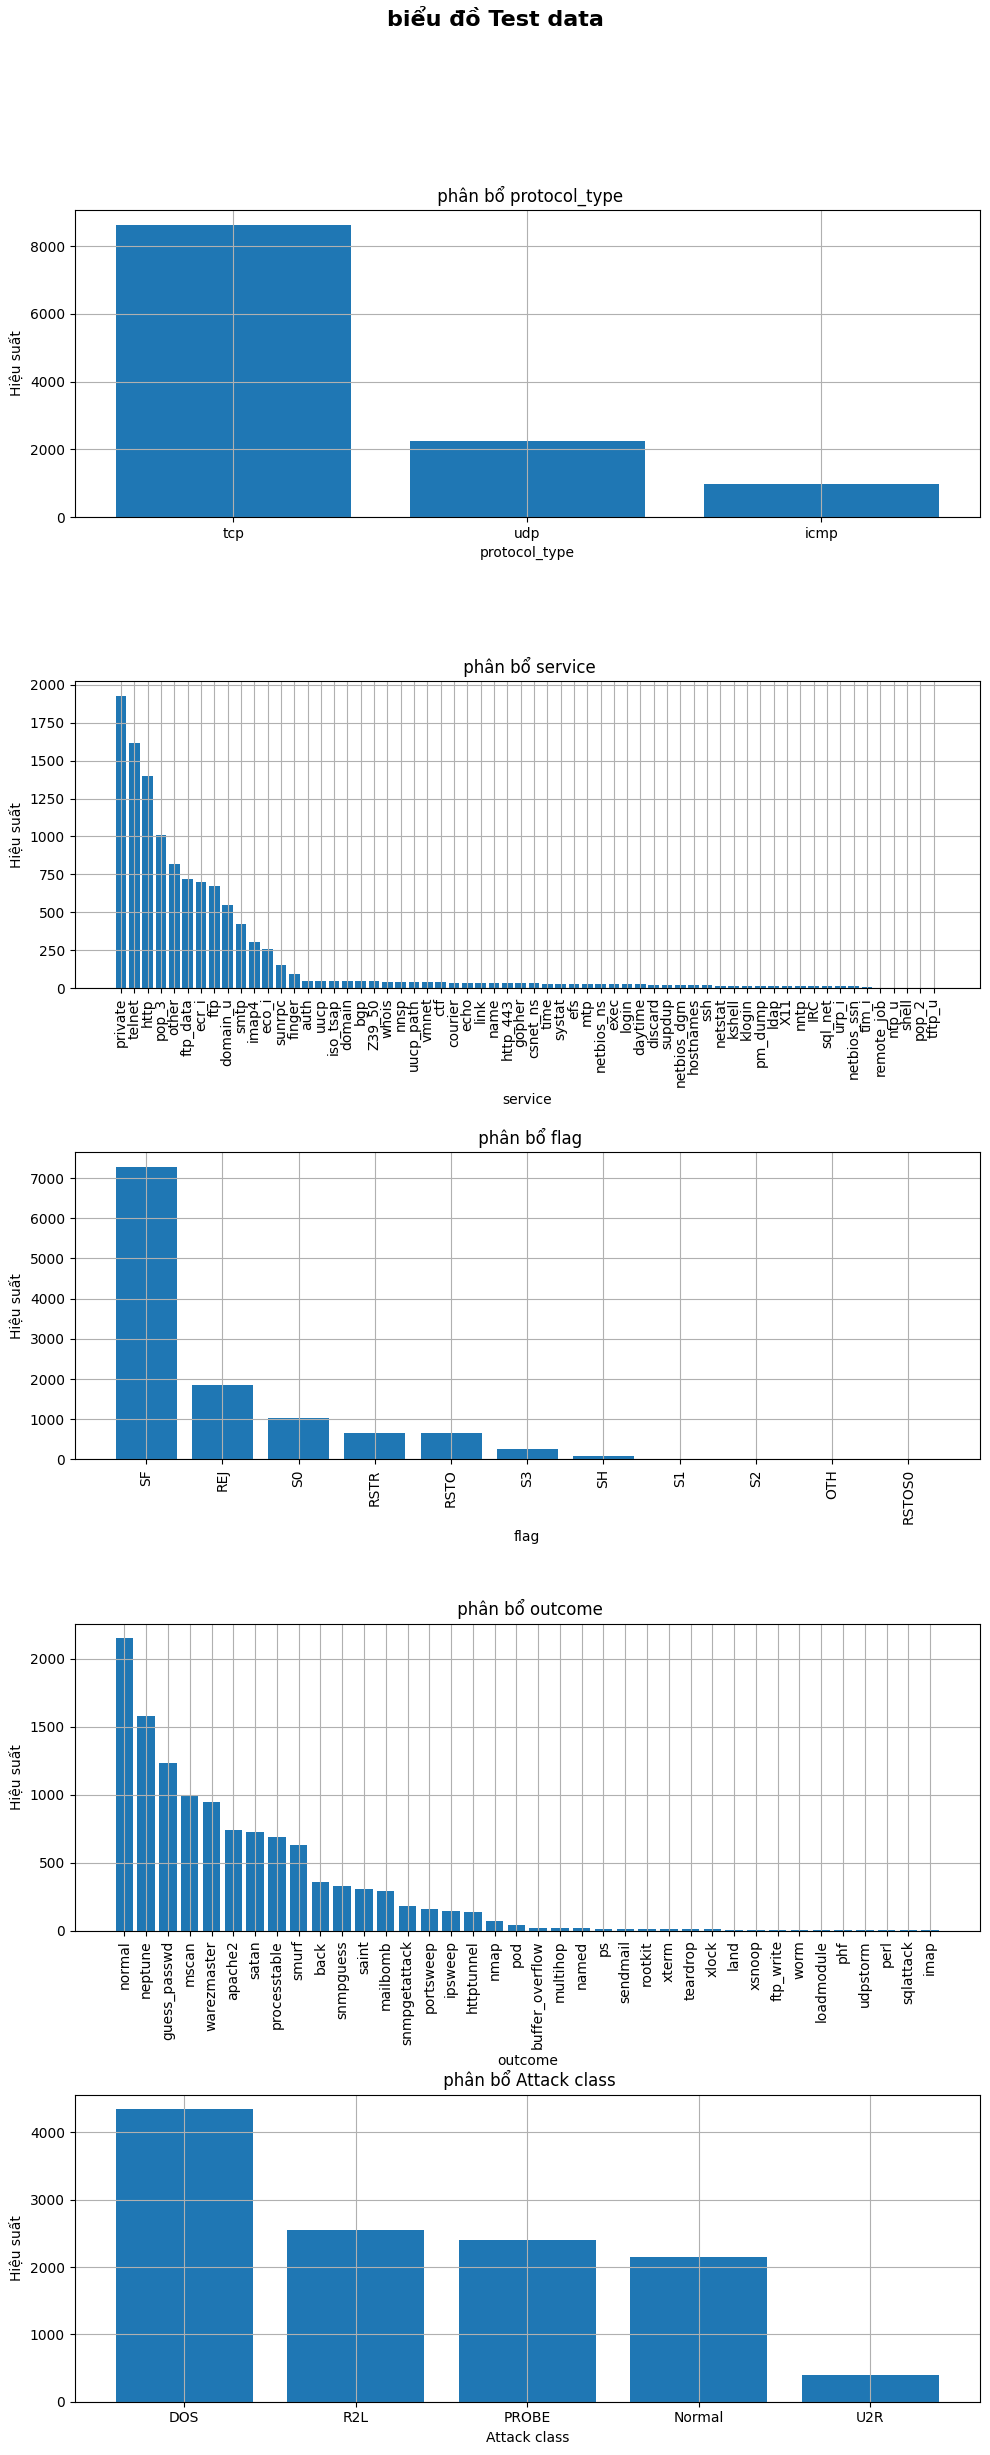

In [36]:
# Plot train data
bar_plots(get_columns(data_test), "Test")

## phân bố lớp tấn công test data

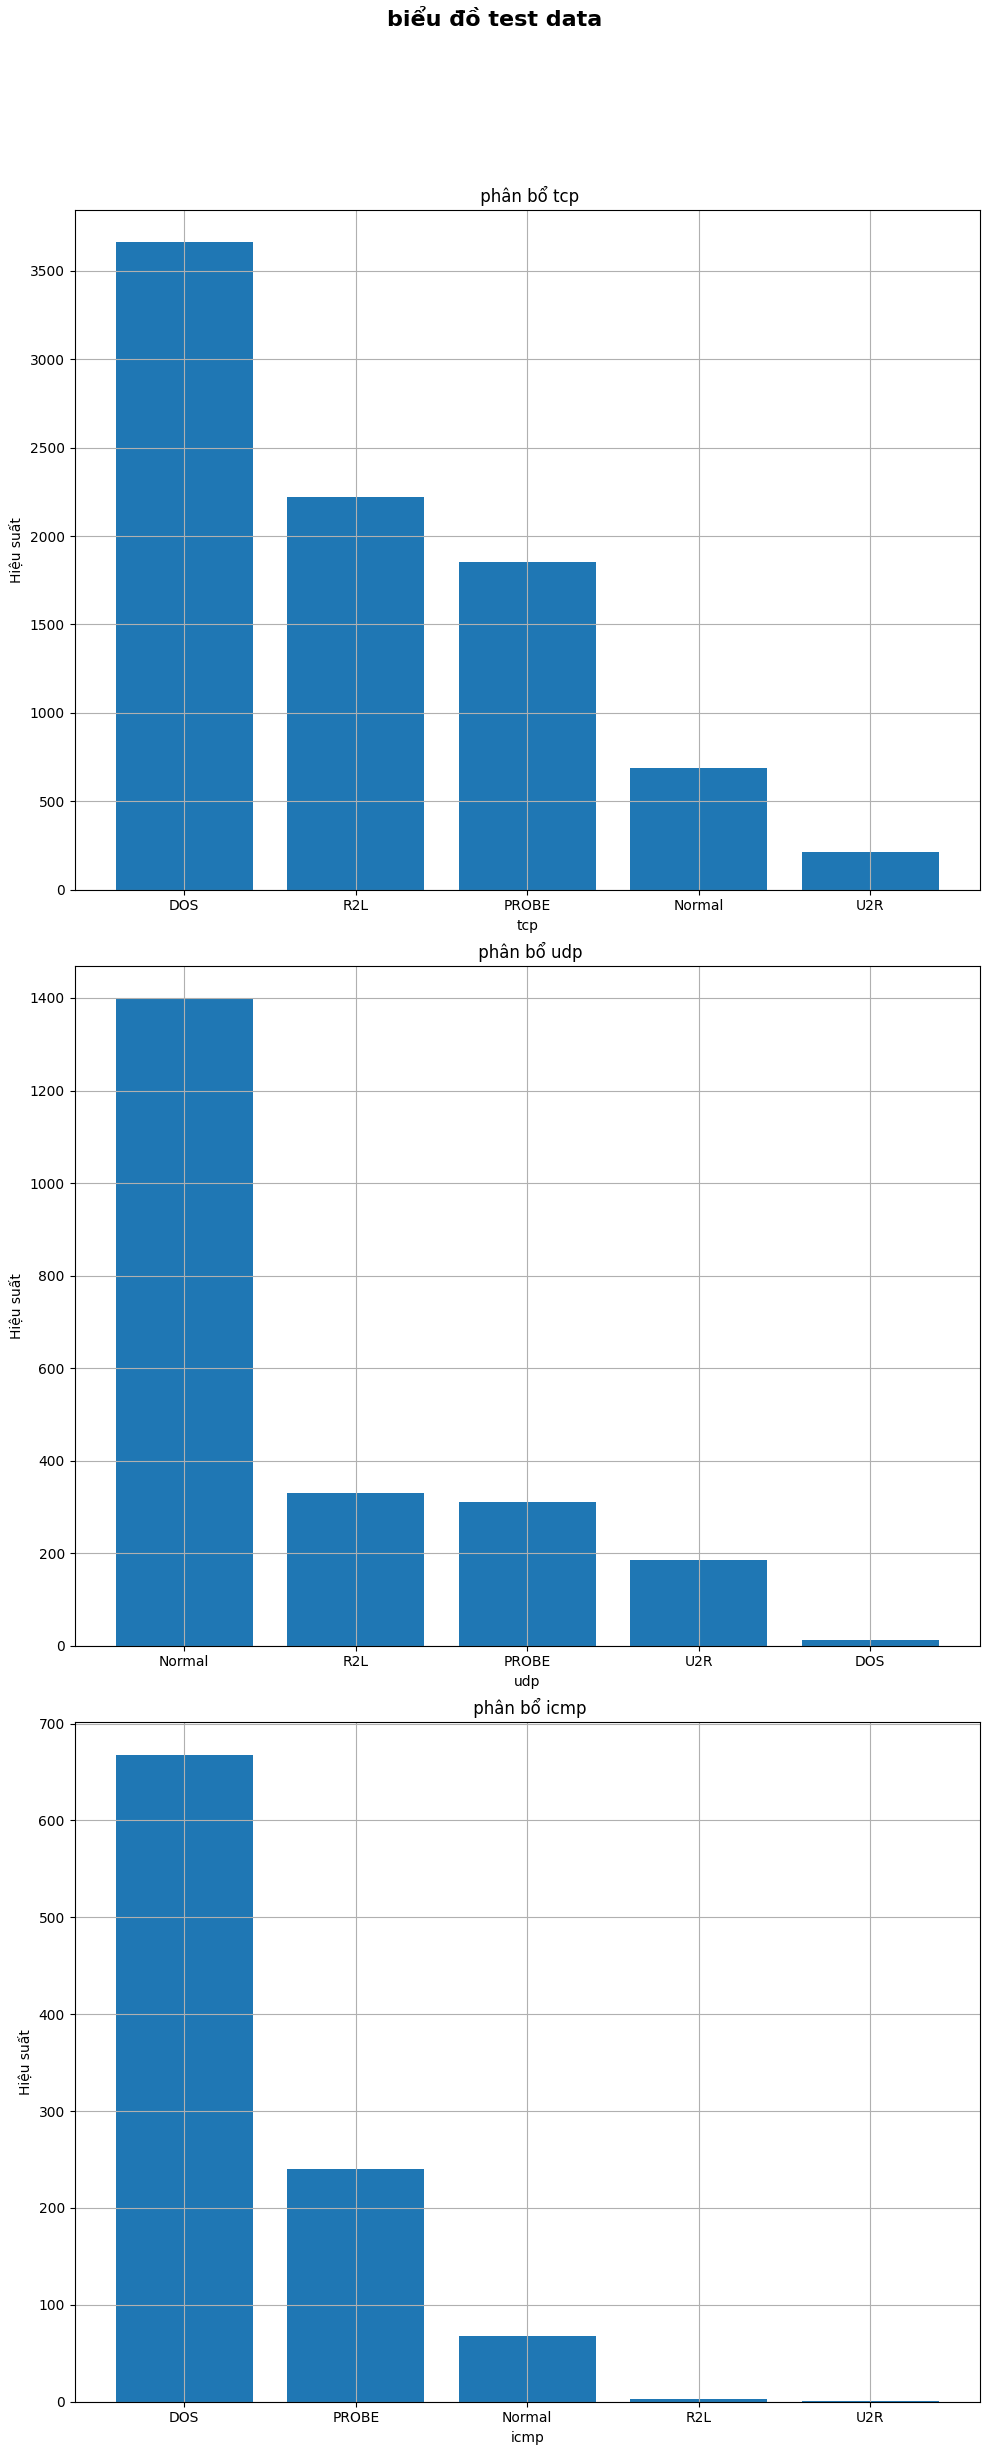

In [37]:
# Plot test data
bar_plots(get_distribution(data_test, "Attack class"), "test")

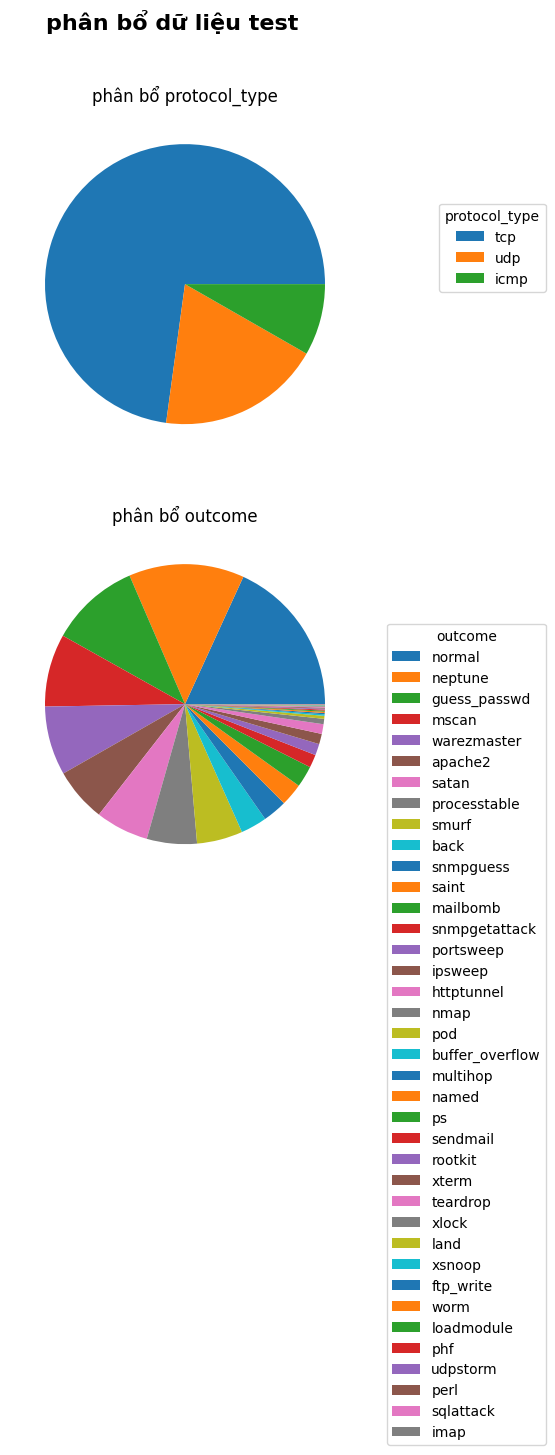

In [38]:
pie_plots(data_test, "test")

## heat map

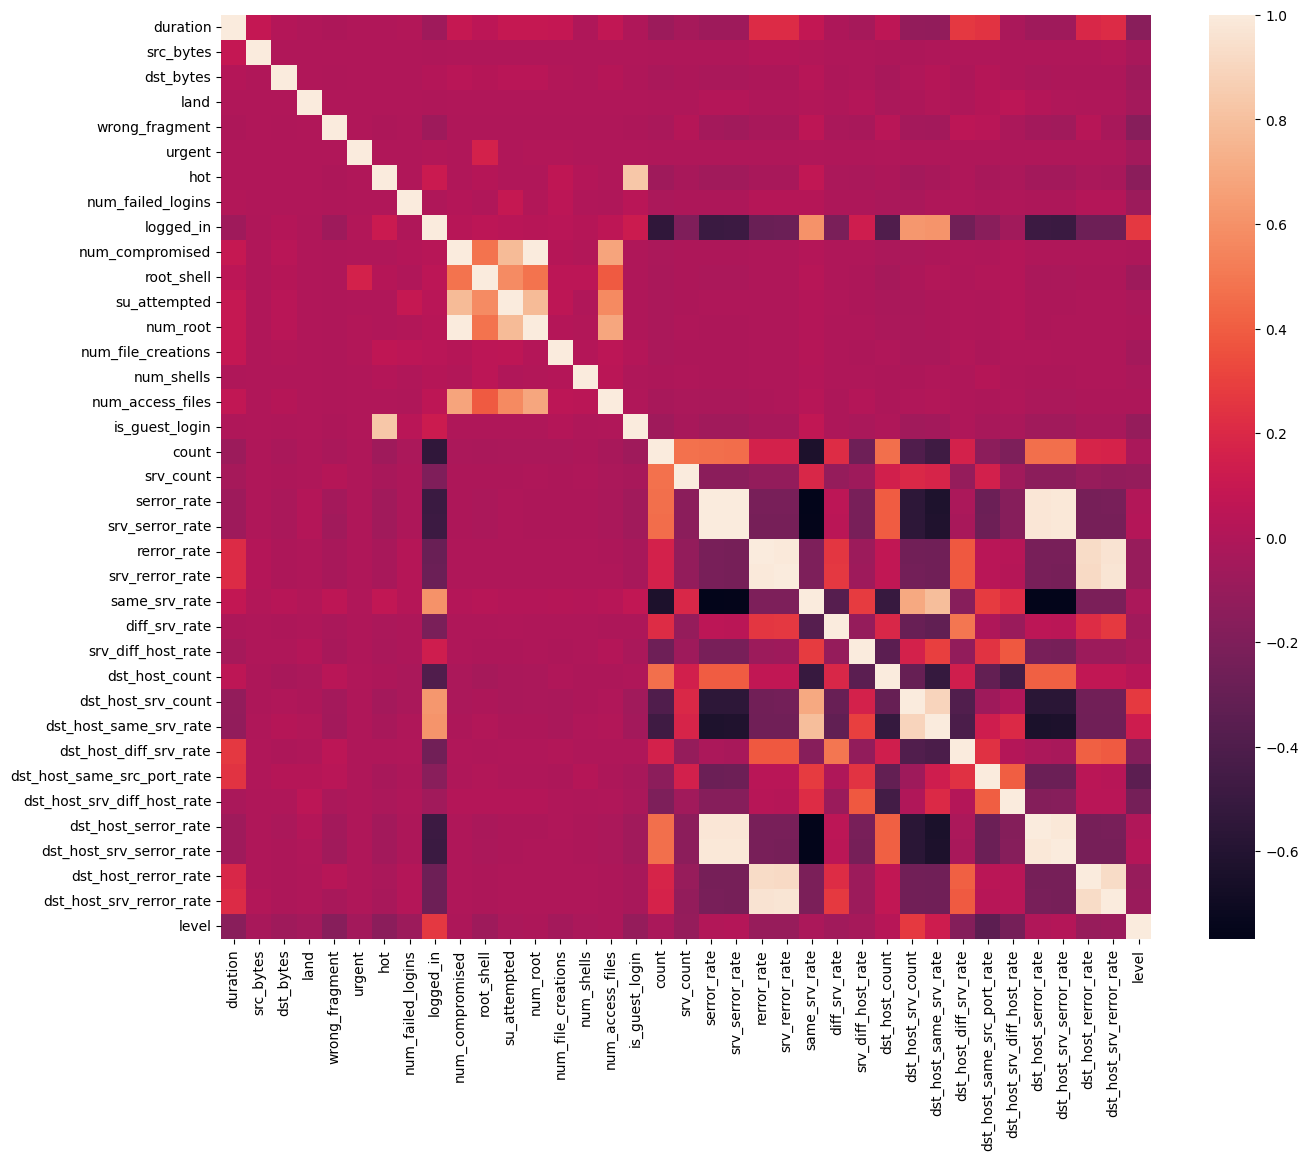

In [39]:
# Train data heatmap
correlation(data_train)

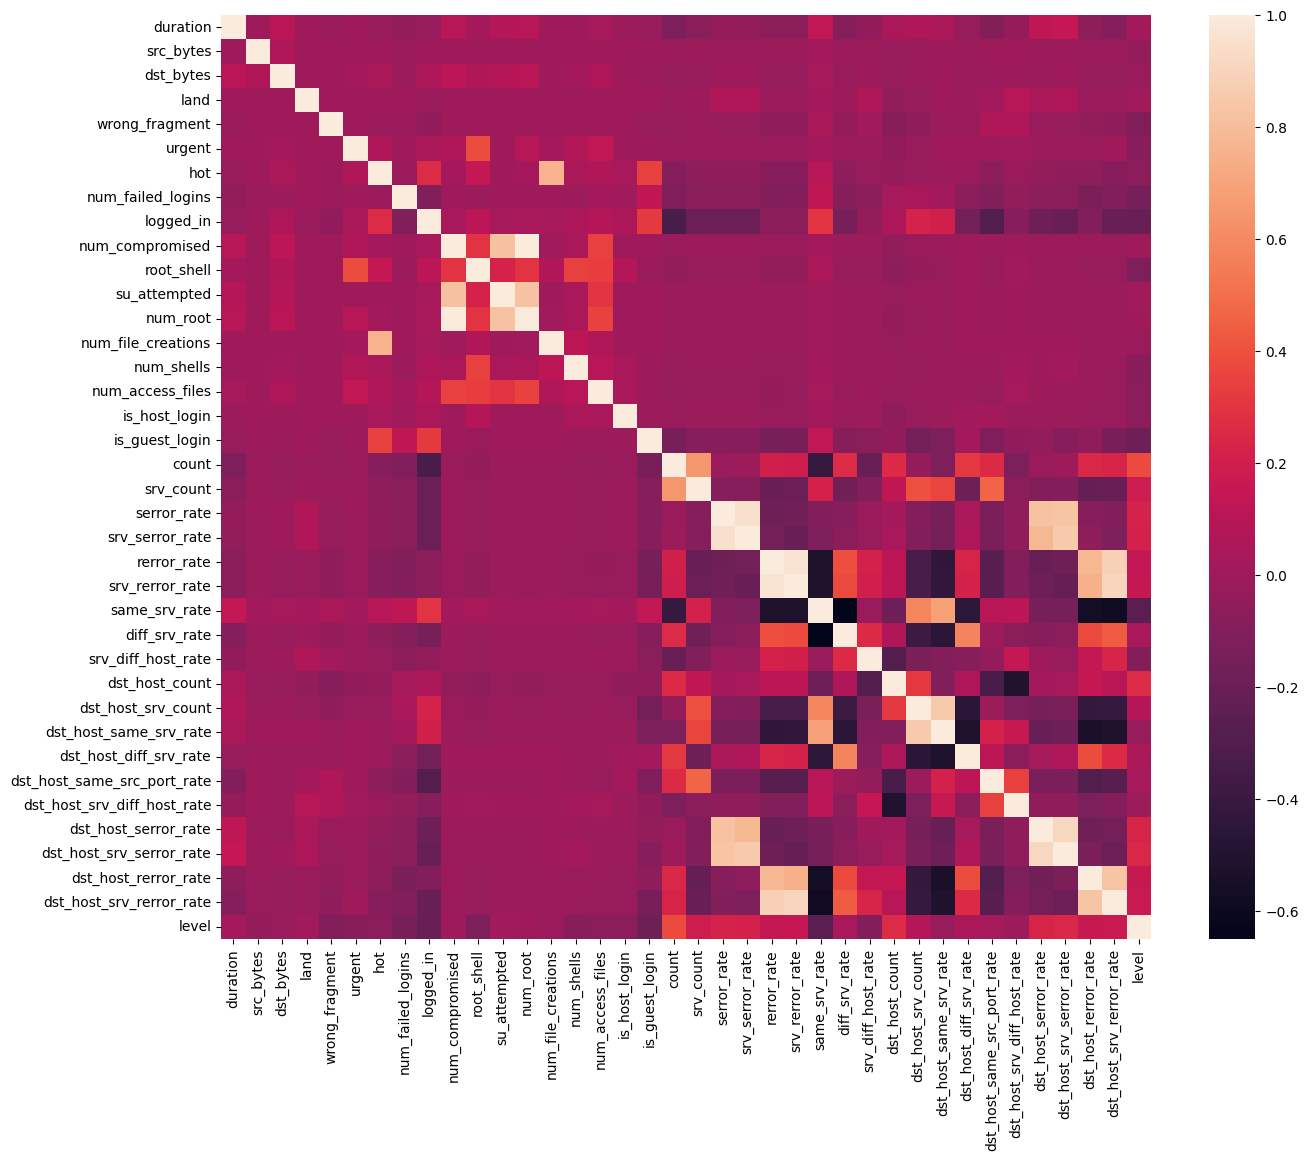

In [40]:
# Train data heatmap
correlation(data_test)

## tiền xử lý

In [41]:
complete_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,Attack class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37037,0,udp,domain_u,SF,43,43,0,0,0,0,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,18,Normal
37038,0,tcp,http,SF,336,285,0,0,0,0,...,0.02,0.00,0.00,0.00,0.00,0.05,0.00,normal,18,Normal
37039,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,13,PROBE
37040,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,15,PROBE


In [42]:
data_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,Attack class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,19,DOS
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,0.00,1.00,0.18,0.00,0.00,0.00,0.00,warezclient,12,R2L
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,DOS
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,DOS


In [43]:
data_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level,Attack class
0,13,tcp,telnet,SF,118,2425,0,0,0,0,...,0.12,0.04,0.00,0.00,0.00,0.12,0.30,guess_passwd,2,R2L
1,0,udp,private,SF,44,0,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,snmpguess,12,R2L
2,0,tcp,telnet,S3,0,44,0,0,0,0,...,0.61,0.00,0.00,0.21,0.68,0.60,0.00,processtable,18,DOS
3,0,udp,private,SF,53,55,0,0,0,0,...,0.00,0.87,0.00,0.00,0.00,0.00,0.00,normal,17,Normal
4,0,tcp,private,SH,0,0,0,0,0,0,...,1.00,1.00,0.00,1.00,1.00,0.00,0.00,nmap,17,PROBE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0,udp,domain_u,SF,43,43,0,0,0,0,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal,18,Normal
11846,0,tcp,http,SF,336,285,0,0,0,0,...,0.02,0.00,0.00,0.00,0.00,0.05,0.00,normal,18,Normal
11847,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.01,0.02,0.05,0.08,0.85,0.58,mscan,13,PROBE
11848,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,0.03,0.01,0.04,0.00,0.00,0.88,1.00,mscan,15,PROBE


In [44]:
complete_df.loc[complete_df['outcome'] == "normal", "outcome"] = 'normal'
complete_df.loc[complete_df['outcome'] != 'normal', "outcome"] = 'attack'

In [45]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [46]:
data_test.loc[data_test['outcome'] == "normal", "outcome"] = 'normal'
data_test.loc[data_test['outcome'] != 'normal', "outcome"] = 'attack'

In [47]:
print(data_train.shape)
print(data_test.shape)
print(complete_df.shape)

(25192, 44)
(11850, 44)
(37042, 44)


In [48]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

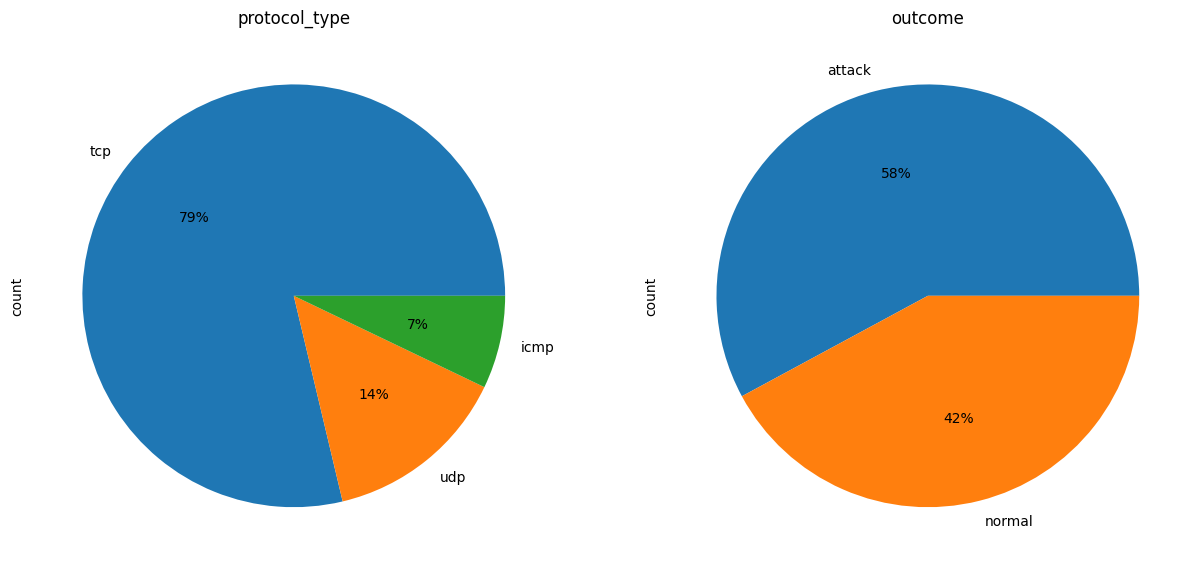

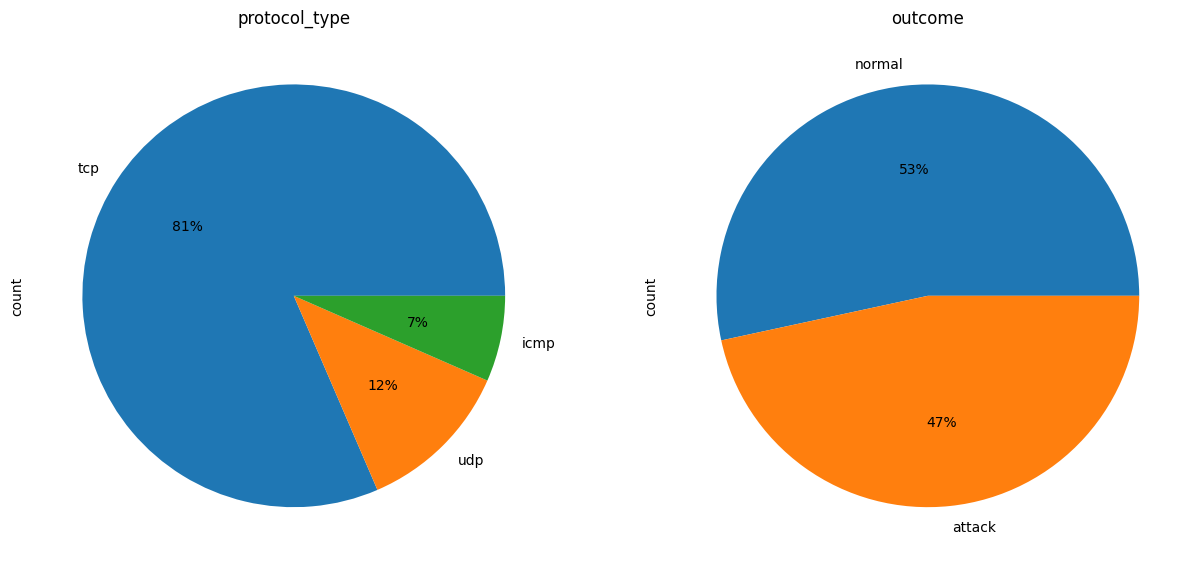

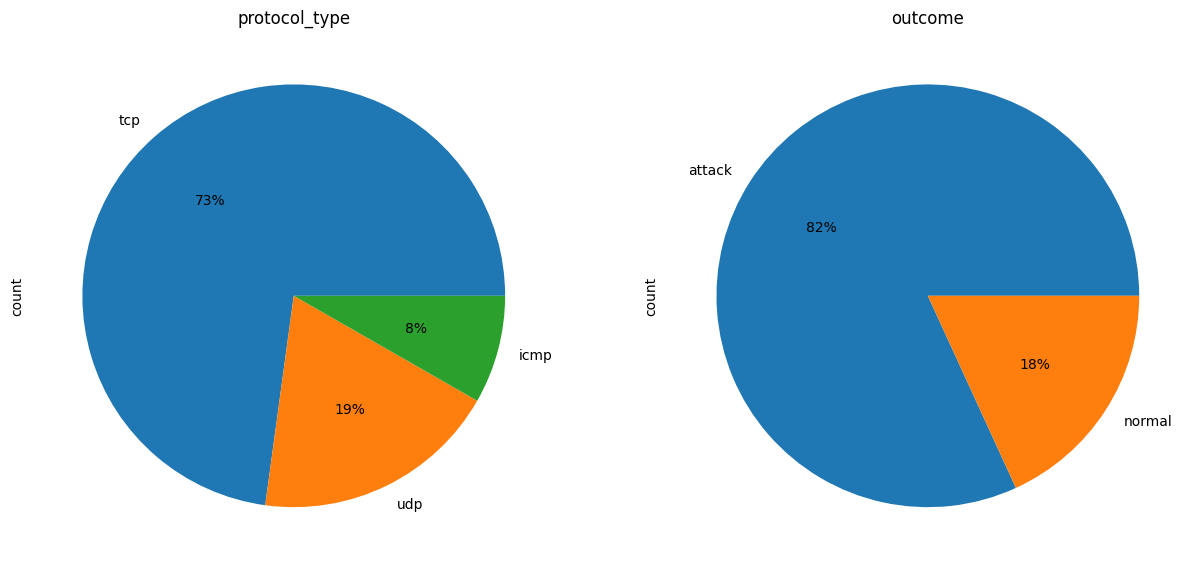

In [49]:
pie_plot(complete_df, ['protocol_type', 'outcome'], 1, 2)
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)
pie_plot(data_test, ['protocol_type', 'outcome'], 1, 2)


In [50]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [51]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome','Attack class']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [52]:
scaled_train_fl = preprocess(complete_df)
scaled_train = preprocess(data_train)
scaled_test = preprocess(data_test)


In [53]:
print(scaled_train_fl.shape)
print(scaled_train.shape)
print(scaled_test.shape)

(37042, 122)
(25192, 121)
(11850, 117)


In [54]:
scaled_train_fl

,land,logged_in,is_host_login,is_guest_login,outcome,level,Attack class,duration,src_bytes,dst_bytes,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,20,Normal,0.0,1.747082,0.000000,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,15,Normal,0.0,0.404669,0.000000,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,1,19,DOS,0.0,-0.163424,0.000000,...,False,False,False,False,True,False,False,False,False,False
3,0,1,0,0,0,21,Normal,0.0,0.739300,24.706061,...,False,False,False,False,False,False,False,False,True,False
4,0,1,0,0,0,21,Normal,0.0,0.610895,1.272727,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37037,0,0,0,0,0,18,Normal,0.0,0.003891,0.130303,...,False,False,False,False,False,False,False,False,True,False
37038,0,1,0,0,0,18,Normal,0.0,1.143969,0.863636,...,False,False,False,False,False,False,False,False,True,False
37039,0,0,0,0,1,13,PROBE,1.0,-0.163424,0.045455,...,False,True,False,False,False,False,False,False,False,False
37040,0,0,0,0,1,15,PROBE,0.0,-0.163424,0.000000,...,True,False,False,False,False,False,False,False,False,False


In [55]:
scaled_train

,land,logged_in,is_host_login,is_guest_login,outcome,level,Attack class,duration,src_bytes,dst_bytes,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,20,Normal,0.0,1.602151,0.000000,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,0,15,Normal,0.0,0.365591,0.000000,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,1,19,DOS,0.0,-0.157706,0.000000,...,False,False,False,False,True,False,False,False,False,False
3,0,1,0,0,0,21,Normal,0.0,0.673835,15.375766,...,False,False,False,False,False,False,False,False,True,False
4,0,1,0,0,0,21,Normal,0.0,0.555556,0.792079,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,1,19,DOS,0.0,-0.157706,0.000000,...,False,True,False,False,False,False,False,False,False,False
25188,0,1,0,0,1,12,R2L,0.0,1.039427,0.000000,...,False,False,False,False,False,False,False,False,True,False
25189,0,0,0,0,1,21,DOS,0.0,-0.157706,0.000000,...,True,False,False,False,False,False,False,False,False,False
25190,0,0,0,0,1,20,DOS,0.0,-0.157706,0.000000,...,False,False,False,False,True,False,False,False,False,False


In [56]:
scaled_test

,land,logged_in,is_host_login,is_guest_login,outcome,level,Attack class,duration,src_bytes,dst_bytes,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,1,2,R2L,13.0,0.56250,26.075269,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,1,12,R2L,0.0,0.10000,0.000000,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,1,18,DOS,0.0,-0.17500,0.473118,...,False,False,False,False,False,False,False,True,False,False
3,0,0,0,0,0,17,Normal,0.0,0.15625,0.591398,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,1,17,PROBE,0.0,-0.17500,0.000000,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0,0,0,0,0,18,Normal,0.0,0.09375,0.462366,...,False,False,False,False,False,False,False,False,True,False
11846,0,1,0,0,0,18,Normal,0.0,1.92500,3.064516,...,False,False,False,False,False,False,False,False,True,False
11847,0,0,0,0,1,13,PROBE,1.0,-0.17500,0.161290,...,False,True,False,False,False,False,False,False,False,False
11848,0,0,0,0,1,15,PROBE,0.0,-0.17500,0.000000,...,True,False,False,False,False,False,False,False,False,False


In [57]:
x = scaled_train.drop(['outcome', 'level','Attack class','logged_in'] , axis = 1).values
y = scaled_train['outcome'].values
y_reg = scaled_train['level'].values

pca = PCA(n_components=49)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)

Number of original features is 117 and of reduced features is 49


In [58]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy GaussianNB 92.59167369622389  Test Accuracy GaussianNB 93.66937884500894
Training Precesion GaussianNB 92.92324442025041  Test Precesion GaussianNB 94.36253252385083
Training Recall GaussianNB 91.01087651951374  Test Recall GaussianNB 92.00845665961945


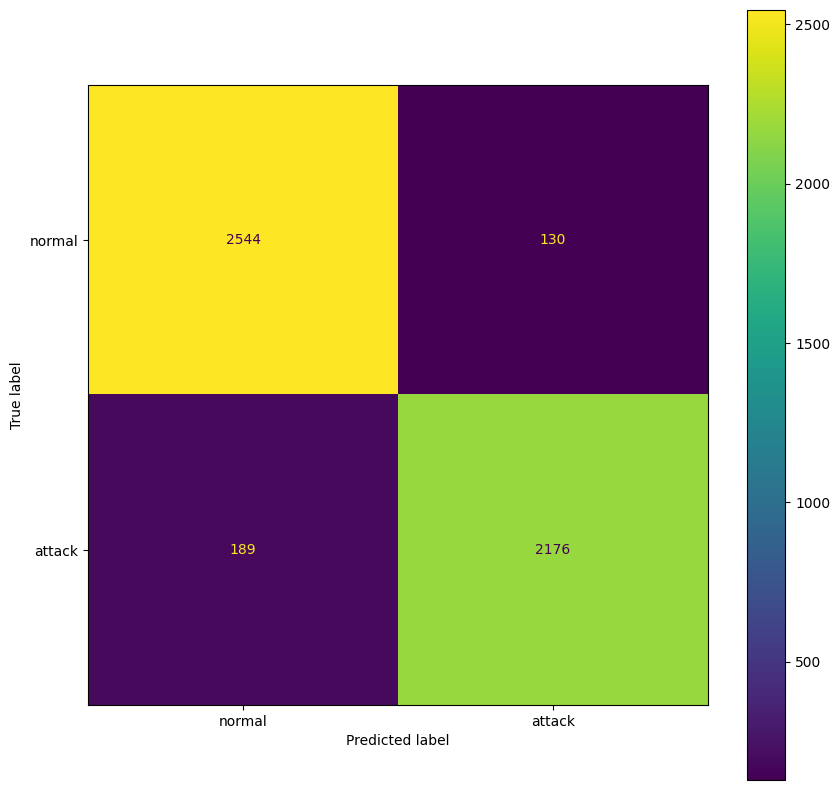

In [59]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

In [60]:
scaled_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Columns: 121 entries, land to flag_SH
dtypes: bool(80), float64(34), int64(5), object(2)
memory usage: 9.8+ MB


In [61]:
scaled_test

,land,logged_in,is_host_login,is_guest_login,outcome,level,Attack class,duration,src_bytes,dst_bytes,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,1,2,R2L,13.0,0.56250,26.075269,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0,1,12,R2L,0.0,0.10000,0.000000,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,1,18,DOS,0.0,-0.17500,0.473118,...,False,False,False,False,False,False,False,True,False,False
3,0,0,0,0,0,17,Normal,0.0,0.15625,0.591398,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,1,17,PROBE,0.0,-0.17500,0.000000,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,0,0,0,0,0,18,Normal,0.0,0.09375,0.462366,...,False,False,False,False,False,False,False,False,True,False
11846,0,1,0,0,0,18,Normal,0.0,1.92500,3.064516,...,False,False,False,False,False,False,False,False,True,False
11847,0,0,0,0,1,13,PROBE,1.0,-0.17500,0.161290,...,False,True,False,False,False,False,False,False,False,False
11848,0,0,0,0,1,15,PROBE,0.0,-0.17500,0.000000,...,True,False,False,False,False,False,False,False,False,False


In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import numpy as np

# Khởi tạo mô hình LDA
lda = LDA()

# Sử dụng kiểm tra chéo với 5 phân chia (folds)
scores = cross_val_score(lda, x_train, y_train, cv=5)

# In kết quả các điểm số của kiểm tra chéo
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

# Tiến hành huấn luyện mô hình LDA trên toàn bộ tập dữ liệu huấn luyện
lda.fit(x_train, y_train)

# sử dụng phương pháp LDA để giảm số lượng đặc trưng
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

# Huấn luyện mô hình dự đoán trên dữ liệu đã giảm số lượng đặc trưng
gnb_lda = GaussianNB().fit(x_train_lda, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test_lda = gnb_lda.predict(x_test_lda)

# Đánh giá hiệu suất trên tập kiểm tra
accuracy_test_lda = metrics.accuracy_score(y_test, y_pred_test_lda)
precision_test_lda = metrics.precision_score(y_test, y_pred_test_lda)
recall_test_lda = metrics.recall_score(y_test, y_pred_test_lda)

# In kết quả
print("Accuracy on test set (LDA):", accuracy_test_lda)
print("Precision on test set (LDA):", precision_test_lda)
print("Recall on test set (LDA):", recall_test_lda)
# Số lượng đặc trưng ban đầu
num_features_initial = x_train.shape[1]

# Số lượng thành phần tuyến tính (đặc trưng mới) được tạo ra bởi LDA
num_components_lda = lda.explained_variance_ratio_.shape[0]

# Số lượng đặc trưng còn lại sau khi sử dụng LDA
num_features_remaining = num_features_initial - num_components_lda

print("Initial number of features:", num_features_initial)
print("Number of components created by LDA:", num_components_lda)
print("Number of features remaining after LDA:", num_features_remaining)


Cross-validation scores: [0.96899032 0.96576532 0.96328454 0.96501241 0.96004963]
Mean accuracy: 0.9646204446556557
Accuracy on test set (LDA): 0.9670569557451876
Precision on test set (LDA): 0.9696710807347287
Recall on test set (LDA): 0.959830866807611
Initial number of features: 117
Number of components created by LDA: 1
Number of features remaining after LDA: 116


Accuracy on training set: 0.9950379596089912
Accuracy on test set: 0.9936495336376265
Precision on test set: 0.9978659837814767
Recall on test set: 0.9885835095137421
MCC on test set: 0.9872822354842049


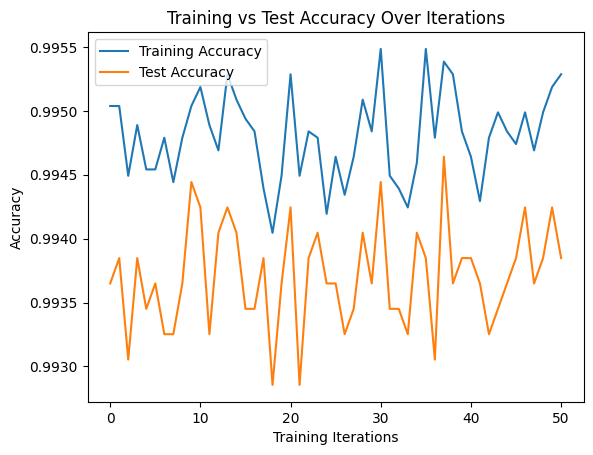

In [63]:

# Huấn luyện mô hình với các tham số đã chọn
rf = RandomForestClassifier(n_estimators=200, max_depth=30, min_samples_split=10, min_samples_leaf=5, max_features='log2')
rf.fit(x_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
train_pred = rf.predict(x_train)
test_pred = rf.predict(x_test)

# Tính độ chính xác trên tập huấn luyện và tập kiểm tra
train_accuracy = metrics.accuracy_score(y_train, train_pred)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

# Tạo một danh sách lưu trữ độ chính xác trên cả hai tập dữ liệu
train_accuracies = [train_accuracy]
test_accuracies = [test_accuracy]

# Tính precision, recall và MCC trên tập kiểm tra
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
mcc = matthews_corrcoef(y_test, test_pred)


# In kết quả
print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)
print("Precision on test set:", precision)
print("Recall on test set:", recall)
print("MCC on test set:", mcc)


# Lặp lại quá trình huấn luyện và đánh giá trên nhiều lần
for i in range(50):  # Thực hiện 10 lần huấn luyện và đánh giá
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    test_pred = rf.predict(x_test)

    train_accuracy = metrics.accuracy_score(y_train, train_pred)
    test_accuracy = metrics.accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Vẽ biểu đồ
plt.plot(range(len(train_accuracies)), train_accuracies, label='Training Accuracy')
plt.plot(range(len(test_accuracies)), test_accuracies, label='Test Accuracy')
plt.xlabel('Training Iterations')
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy Over Iterations')
plt.legend()
plt.show()

Training Accuracy RandomForest 99.52860616285416  Test Accuracy RandomForest 99.38479857114507
Training Precesion RandomForest 99.87106478994305  Test Precesion RandomForest 99.82920580700257
Training Recall RandomForest 99.11494988270421  Test Recall RandomForest 98.8583509513742


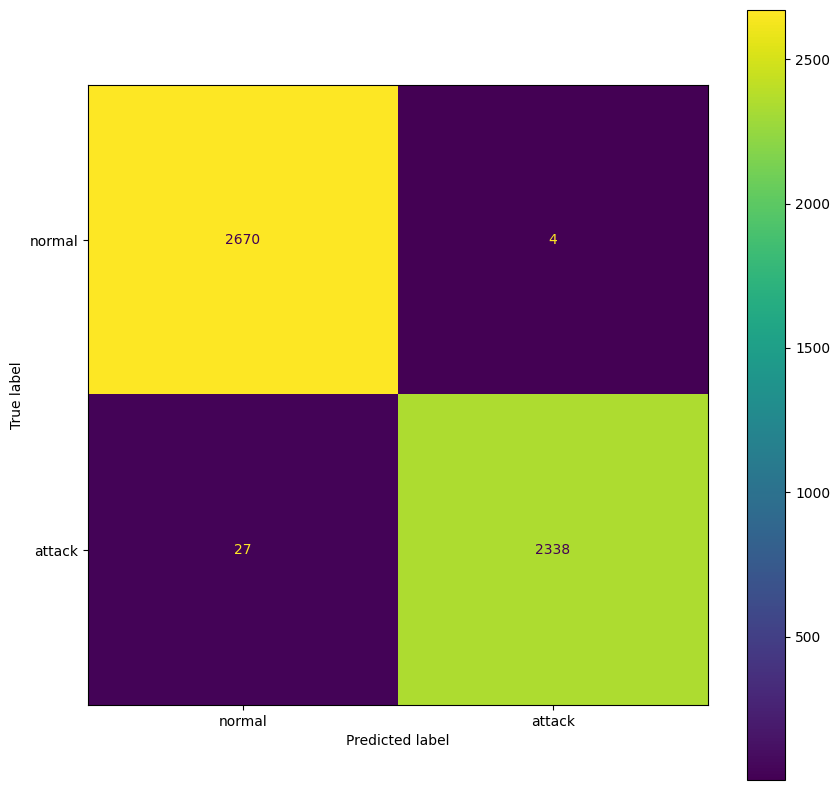

In [64]:
evaluate_classification(rf, "RandomForest", x_train, x_test, y_train, y_test)


In [65]:
# ## chạy khá lâu(không nên chạy khi không có thời gian)
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Tạo một đối tượng RandomForestClassifier
# rf = RandomForestClassifier()

# # Danh sách các tham số cần tinh chỉnh
# param_grid = {
#     'n_estimators': [50, 200],
#     'max_depth': [10, 30],
#     'min_samples_split': [2, 10],
#     'min_samples_leaf': [1, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Sử dụng kiểm định chéo GridSearchCV để tìm ra bộ tham số tốt nhất
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train, y_train)

# # In ra bộ tham số tốt nhất
# print("Best parameters:", grid_search.best_params_)

# # Đánh giá mô hình tốt nhất trên tập kiểm tra
# best_rf = grid_search.best_estimator_
# test_accuracy = best_rf.score(x_test, y_test)
# print("Accuracy on test set:", test_accuracy)


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics
import numpy as np

# Khởi tạo mô hình LDA
lda = LDA()

# Sử dụng kiểm tra chéo với 5 phân chia (folds)
scores = cross_val_score(lda, x_train, y_train, cv=5)

# In kết quả các điểm số của kiểm tra chéo
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

# Tiến hành huấn luyện mô hình LDA trên toàn bộ tập dữ liệu huấn luyện
lda.fit(x_train, y_train)

# sử dụng phương pháp LDA để giảm số lượng đặc trưng
x_train_lda = lda.transform(x_train)
x_test_lda = lda.transform(x_test)

# Huấn luyện mô hình RandomForestClassifier dựa trên dữ liệu đã giảm số lượng đặc trưng
rf_lda = RandomForestClassifier()
rf_lda.fit(x_train_lda, y_train)

# Dự đoán trên tập kiểm tra đã giảm số lượng đặc trưng
y_pred_test_lda = rf_lda.predict(x_test_lda)

# Đánh giá hiệu suất trên tập kiểm tra đã giảm số lượng đặc trưng
accuracy_test_lda = metrics.accuracy_score(y_test, y_pred_test_lda)
precision_test_lda = metrics.precision_score(y_test, y_pred_test_lda)
recall_test_lda = metrics.recall_score(y_test, y_pred_test_lda)
confusion_matrix_lda = metrics.confusion_matrix(y_test, y_pred_test_lda)

# In kết quả
print("Accuracy on test set (RandomForestClassifier with LDA):", accuracy_test_lda)
print("Precision on test set (RandomForestClassifier with LDA):", precision_test_lda)
print("Recall on test set (RandomForestClassifier with LDA):", recall_test_lda)
print("Confusion Matrix (RandomForestClassifier with LDA):\n", confusion_matrix_lda)


Cross-validation scores: [0.96899032 0.96576532 0.96328454 0.96501241 0.96004963]
Mean accuracy: 0.9646204446556557
Accuracy on test set (RandomForestClassifier with LDA): 0.9523715022821988
Precision on test set (RandomForestClassifier with LDA): 0.9496402877697842
Recall on test set (RandomForestClassifier with LDA): 0.9488372093023256
Confusion Matrix (RandomForestClassifier with LDA):
 [[2555  119]
 [ 121 2244]]


In [67]:
tdt = DecisionTreeClassifier().fit(x_train, y_train)

In [68]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10,10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)


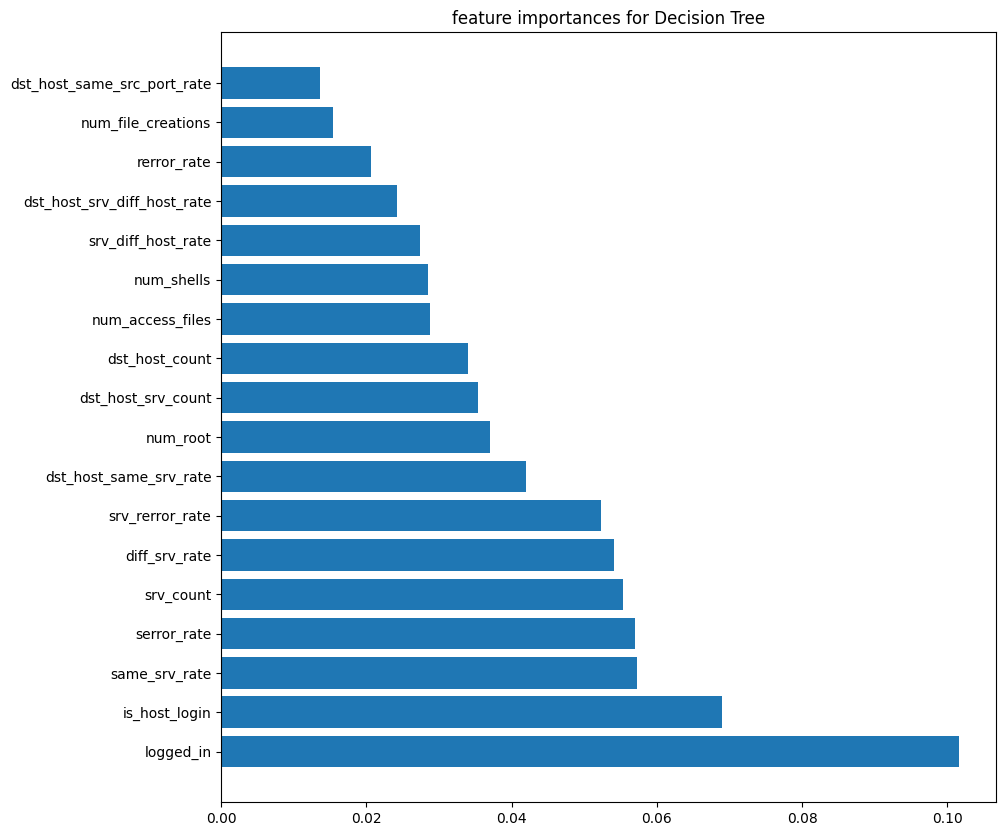

In [69]:
f_importances(abs(rf.feature_importances_), features_names, top=18)

In [70]:
xg_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(x_train_reg, y_train_reg)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:09:14] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


In [71]:
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(x_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(x_test_reg), squared=False)
print("Training Error " + str(name) + " {}  Test error ".format(train_error) + str(name) + " {}".format(test_error))

Training Error XGBOOST 0.8810035597167831  Test error XGBOOST 1.0087394360743784


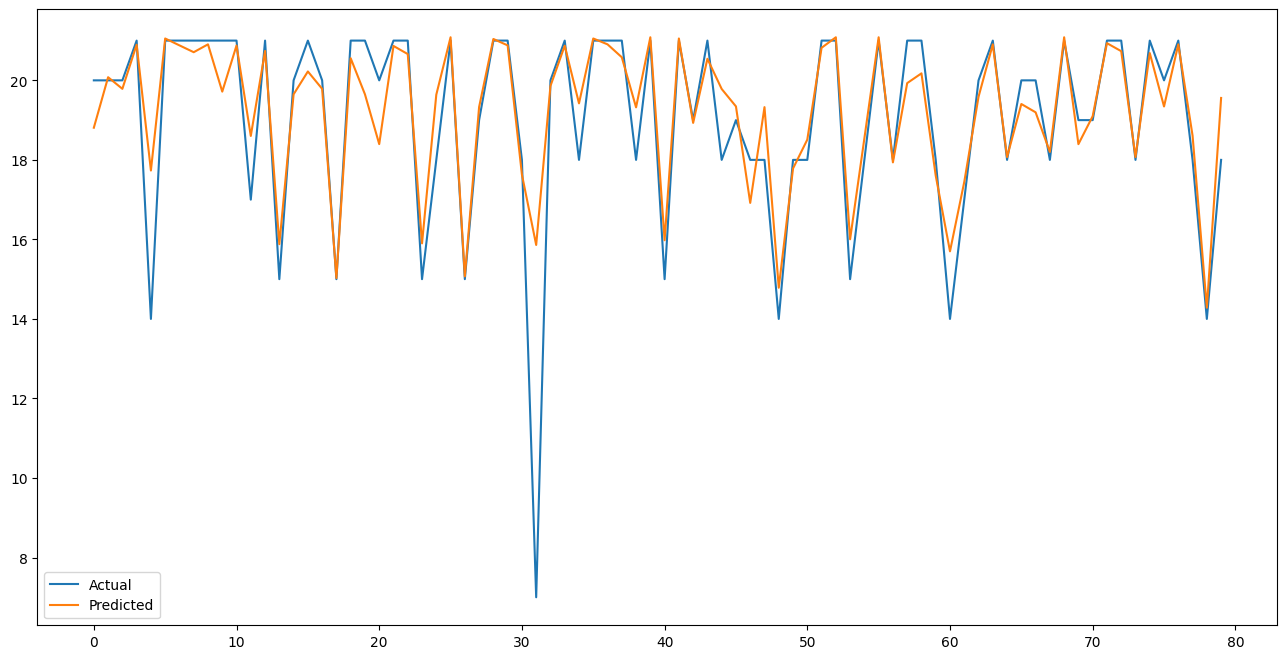

In [72]:
y_pred = xg_r.predict(x_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg , "Y_pred" : y_pred})
plt.figure(figsize=(16,8))
plt.plot(df[:80])
plt.legend(['Actual' , 'Predicted'])

In [73]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Accuracy Linear SVC(LBasedImpl) 96.57619213020394  Test Accuracy Linear SVC(LBasedImpl) 96.78507640404843
Training Precesion Linear SVC(LBasedImpl) 98.02122485076276  Test Precesion Linear SVC(LBasedImpl) 97.82891880156318
Training Recall Linear SVC(LBasedImpl) 94.55107698869695  Test Recall Linear SVC(LBasedImpl) 95.26427061310783


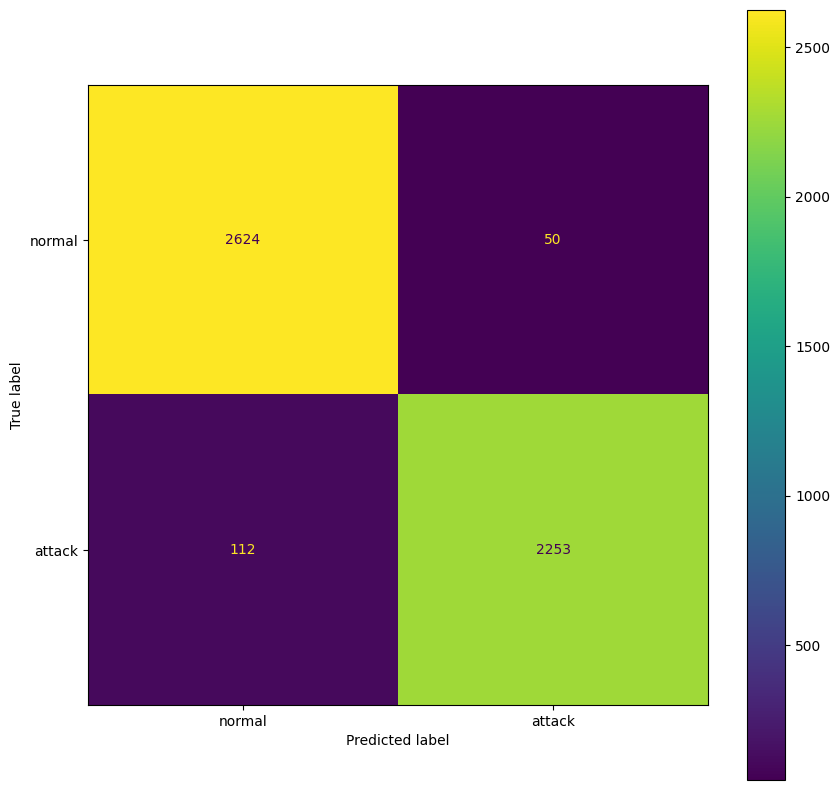

In [74]:
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình LDA
lda = LDA()

# Sử dụng LDA để giảm số chiều của dữ liệu huấn luyện và kiểm tra
x_train_lda = lda.fit_transform(x_train, y_train)
x_test_lda = lda.transform(x_test)

# Huấn luyện mô hình LinearSVC trên dữ liệu đã giảm số chiều
lin_svc = LinearSVC().fit(x_train_lda, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test = lin_svc.predict(x_test_lda)

# Đánh giá hiệu suất của mô hình trên tập kiểm tra
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on test set:", accuracy_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

# Recall
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# Precision
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred_test)
print("MCC:", mcc)

Accuracy on test set: 0.9686445723357809
Confusion Matrix:
[[2617   57]
 [ 101 2264]]
Recall: 0.9572938689217759
Precision: 0.975441619991383
MCC: 0.9371290080144605
